# Analyse the Results of Running Moran Process Experiment on Different Graphs
This is the newest version of this analysis file, where I can merge the csv of different jobs. 

imports

In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from analysis_utils import setup_analysis_environment, load_all_data, load_experiment_data, aggregate_results, plot_property_effect, plot_hybrid_density
# change this if on a different computer!
%cd /home/labs/pilpel/matanyaw/moran-process 
from population_graph import GRAPH_PROPS
# Set aesthetic parameters for "publication-quality" plots
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/labs/pilpel/matanyaw/moran-process


In [6]:
from pathlib import Path

batch_name = 'batch_' + 'big_batch_test'

ROOT = Path(os.getcwd()) 

# Now define your paths relative to ROOT
batch_dir = ROOT / "simulation_data" / "tmp" /  batch_name
data_dir = ROOT / "simulation_data"




In [7]:
results_df = aggregate_results(batch_dir=batch_dir, save_to_dir=data_dir, delete_temp=False)
print("Results Dataframe Shape : ", results_df.shape)



File /home/labs/pilpel/matanyaw/moran-process/simulation_data/big_batch_test_results.csv already exitst! Not aggregating...
✓ Loaded /home/labs/pilpel/matanyaw/moran-process/simulation_data/big_batch_test_results.csv: (12650000, 9)
Results Dataframe Shape :  (12650000, 9)


In [8]:

# Extract data for use in notebook
df_graphs = load_experiment_data('graph_database.csv')       # Graph database


print("Shape before merging: ", results_df.shape)
results_df = pd.merge(
    results_df, 
    df_graphs, 
    on='wl_hash', 
    how='left', 
    suffixes=('', '_db')
)
print("Shape after merging: ", results_df.shape)


✓ Loaded graph_database.csv: (311, 32)
Shape before merging:  (12650000, 9)
Shape after merging:  (12650000, 40)


In [9]:
# Filter for successful fixations for time analysis
success_df = results_df[results_df['fixation'] == True]

# 1. Calculate P(fix) for every unique graph and r value
# Group by category, name, hash, and r
stats_prob = results_df.groupby(['wl_hash', 'r', 'graph_name'])['fixation'].mean().reset_index(name='prob_fixation')

# 2. Calculate Median Steps (Conditional on Fixation)
stats_time_median = success_df.groupby(['wl_hash', 'r', 'graph_name'])['steps'].median().reset_index(name='median_steps')
# Ccompute std and name the column 'std_steps'
stats_time_std = success_df.groupby(['wl_hash', 'r', 'graph_name'])['steps'].std().reset_index(name='std_steps')


# 3. Merge metrics into a single analysis dataframe
analysis_df = pd.merge(stats_prob, stats_time_median, on=['wl_hash', 'r', 'graph_name'], how='outer')
# Merge standard deviation of fixation time
analysis_df = pd.merge(analysis_df, stats_time_std, on=['wl_hash', 'r', 'graph_name'], how='outer')
analysis_df = pd.merge(
    analysis_df, 
    df_graphs, 
    on='wl_hash', 
    how='left', 
    suffixes=('', '_db')
)
analysis_df['z_order'] = np.where(analysis_df['category'] == 'Random', 0, 1)
analysis_df = analysis_df.sort_values('z_order')

analysis_df = analysis_df[analysis_df['category'] != 'Complete']

# Display sample
analysis_df.tail(20)

wl_hash    r         graph_name  prob_fixation  \
429  5bab8fae824aae44499cc96ef6d0f640  2.0  random_n31_e32_23         0.5364   
428  5bab8fae824aae44499cc96ef6d0f640  1.3  random_n31_e32_23         0.2675   
427  5bab8fae824aae44499cc96ef6d0f640  1.2  random_n31_e32_23         0.2011   
432  5c285e17d99e62b08a23d7d6c1da831d  1.2  random_n31_e34_37         0.2067   
426  5bab8fae824aae44499cc96ef6d0f640  1.1  random_n31_e32_23         0.1142   
666  8930697f2d93d4b53c61cfcce1af3ad2  1.1    mammalian_b2_d4         0.1257   
519  6ce340cfc8a2dcdf4b8a7f7d78f74059  2.0         fish_r3_l3         0.5645   
518  6ce340cfc8a2dcdf4b8a7f7d78f74059  1.3         fish_r3_l3         0.2921   
517  6ce340cfc8a2dcdf4b8a7f7d78f74059  1.2         fish_r3_l3         0.2201   
669  8930697f2d93d4b53c61cfcce1af3ad2  2.0    mammalian_b2_d4         0.5478   
668  8930697f2d93d4b53c61cfcce1af3ad2  1.3    mammalian_b2_d4         0.2927   
667  8930697f2d93d4b53c61cfcce1af3ad2  1.2    mammalian_b2_d4         0.2082   
764  9c3de7e9fb2b11fbfca795d2a51c85f0  2.0        avian_r4_l7         0.5094   
665  8930697f2d93d4b53c61cfcce1af3ad2  1.0    mammalian_b2_d4         0.0340   
515  6ce340cfc8a2dcdf4b8a7f7d78f74059  1.0         fish_r3_l3         0.0346   
516  6ce340cfc8a2dcdf4b8a7f7d78f74059  1.1         fish_r3_l3         0.1266   
760  9c3de7e9fb2b11fbfca795d2a51c85f0  1.0        avian_r4_l7         0.0323   
761  9c3de7e9fb2b11fbfca795d2a51c85f0  1.1        avian_r4_l7         0.0970   
762  9c3de7e9fb2b11fbfca795d2a51c85f0  1.2        avian_r4_l7         0.1742   
763  9c3de7e9fb2b11fbfca795d2a51c85f0  1.3        avian_r4_l7         0.2385   

     median_steps    std_steps      graph_name_db graph_type  n_nodes  \
429        1450.0   606.453322  random_n31_e32_23        NaN       31   
428        3273.0  1749.370607  random_n31_e32_23        NaN       31   
427        4252.0  2452.222565  random_n31_e32_23        NaN       31   
432        4298.0  2730.915749  random_n31_e34_37        NaN       31   
426        5478.5  3522.775317  random_n31_e32_23        NaN       31   
666        7046.0  4806.790997    mammalian_b2_d4        NaN       31   
519        2067.0   855.725589         fish_r3_l3        NaN       30   
518        4860.0  2586.037887         fish_r3_l3        NaN       30   
517        6499.0  3824.014543         fish_r3_l3        NaN       30   
669        1653.0   681.427077    mammalian_b2_d4        NaN       31   
668        4034.0  2109.478948    mammalian_b2_d4        NaN       31   
667        5272.5  3015.350307    mammalian_b2_d4        NaN       31   
764         861.0   332.225733        avian_r4_l7        NaN       31   
665        8965.5  6878.992414    mammalian_b2_d4        NaN       31   
515       10935.0  8756.359574         fish_r3_l3        NaN       30   
516        8452.0  6208.856176         fish_r3_l3        NaN       30   
760        2920.0  2204.908374        avian_r4_l7        NaN       31   
761        2654.5  1725.199539        avian_r4_l7        NaN       31   
762        2135.0  1215.147142        avian_r4_l7        NaN       31   
763        1755.0   870.457304        avian_r4_l7        NaN       31   

     n_edges  ...  avg_closeness_centrality  max_closeness_centrality  \
429       32  ...                  0.209188                  0.288462   
428       32  ...                  0.209188                  0.288462   
427       32  ...                  0.209188                  0.288462   
432       34  ...                  0.269026                  0.434783   
426       32  ...                  0.209188                  0.288462   
666       30  ...                  0.208785                  0.306122   
519       29  ...                  0.208357                  0.315217   
518       29  ...                  0.208357                  0.315217   
517       29  ...                  0.208357                  0.315217   
669       30  ...                  0.208785                  0.306122   
668       30

In [10]:
print(GRAPH_PROPS)

['n_nodes', 'n_edges', 'density', 'diameter', 'avg_degree', 'average_clustering', 'average_shortest_path_length', 'degree_assortativity', 'avg_betweenness_centrality', 'max_degree', 'min_degree', 'degree_std', 'transitivity', 'radius', 'avg_degree_centrality', 'max_degree_centrality', 'max_betweenness_centrality', 'avg_closeness_centrality', 'max_closeness_centrality']


['n_nodes', 'n_edges', 'density', 'diameter', 'avg_degree', 'average_clustering', 'average_shortest_path_length', 'degree_assortativity', 'avg_betweenness_centrality', 'max_degree', 'min_degree', 'degree_std', 'transitivity', 'radius', 'avg_degree_centrality', 'max_degree_centrality', 'max_betweenness_centrality', 'avg_closeness_centrality', 'max_closeness_centrality']


/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


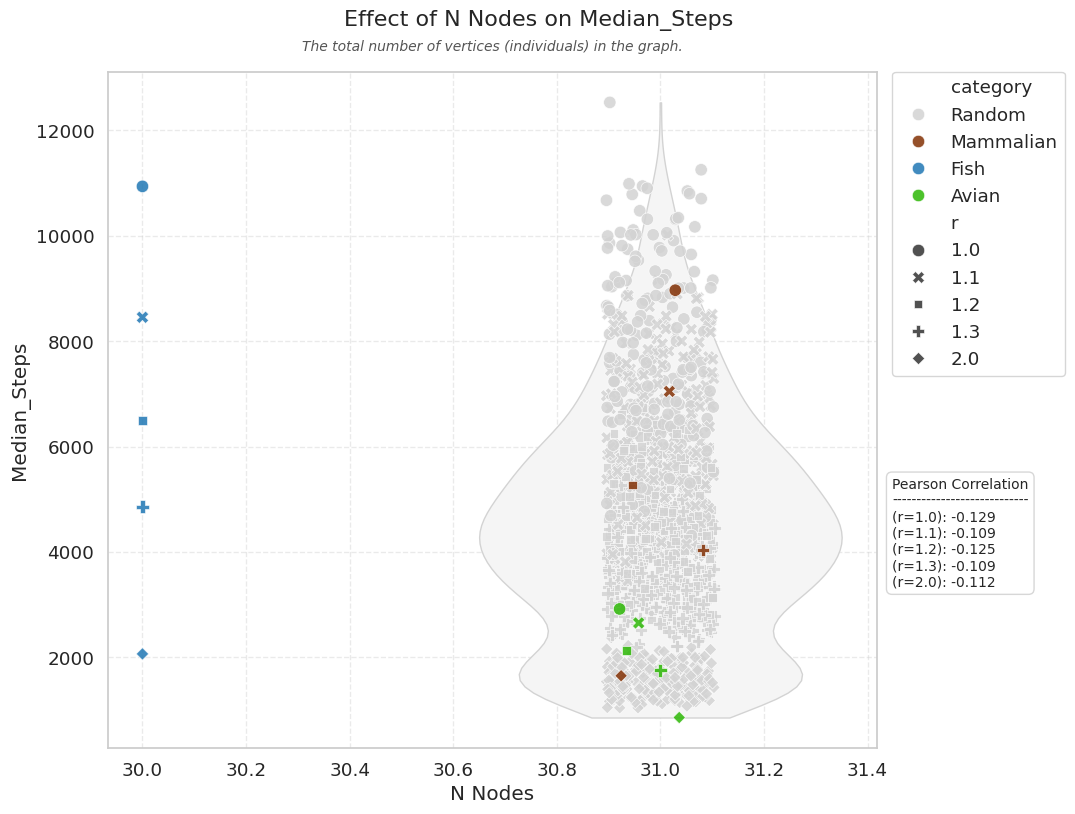

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


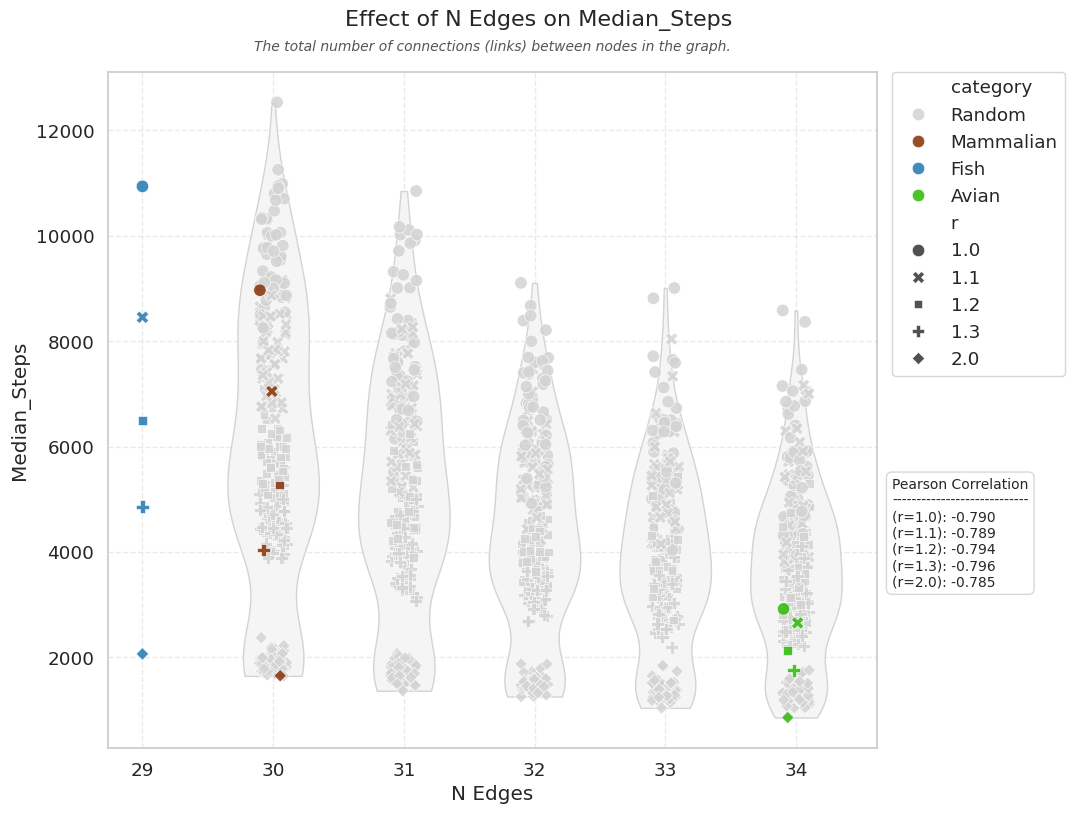

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


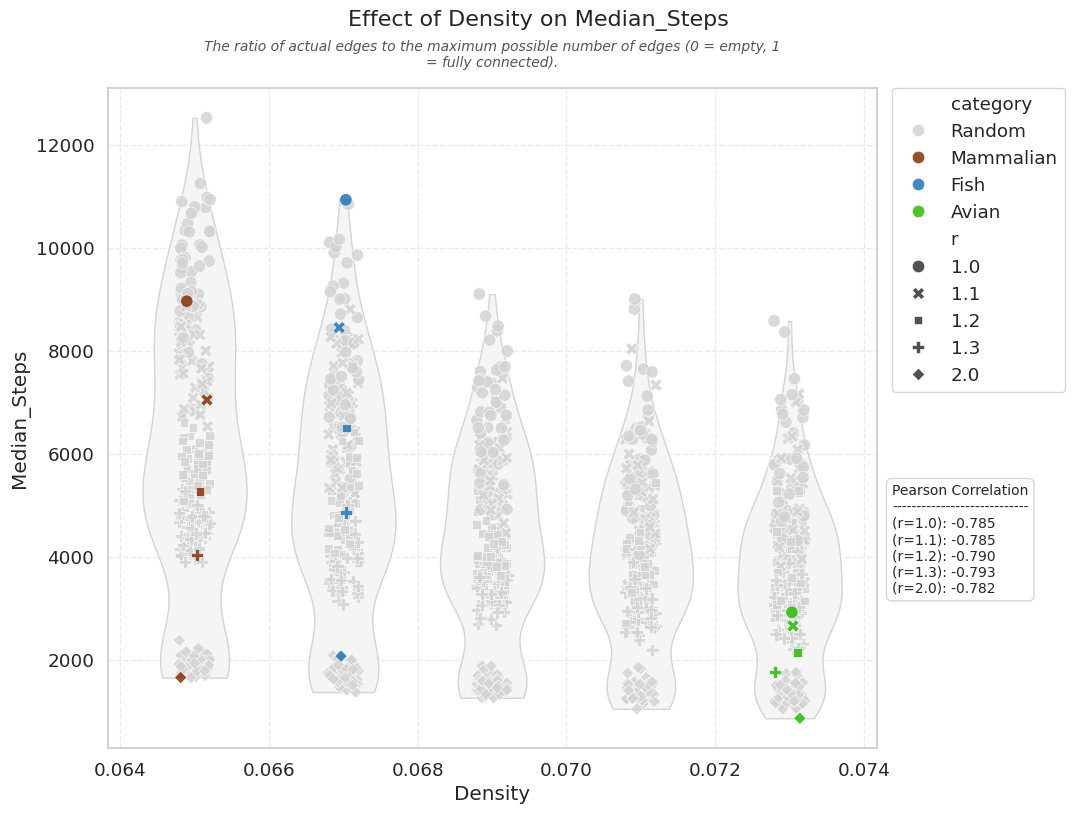

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


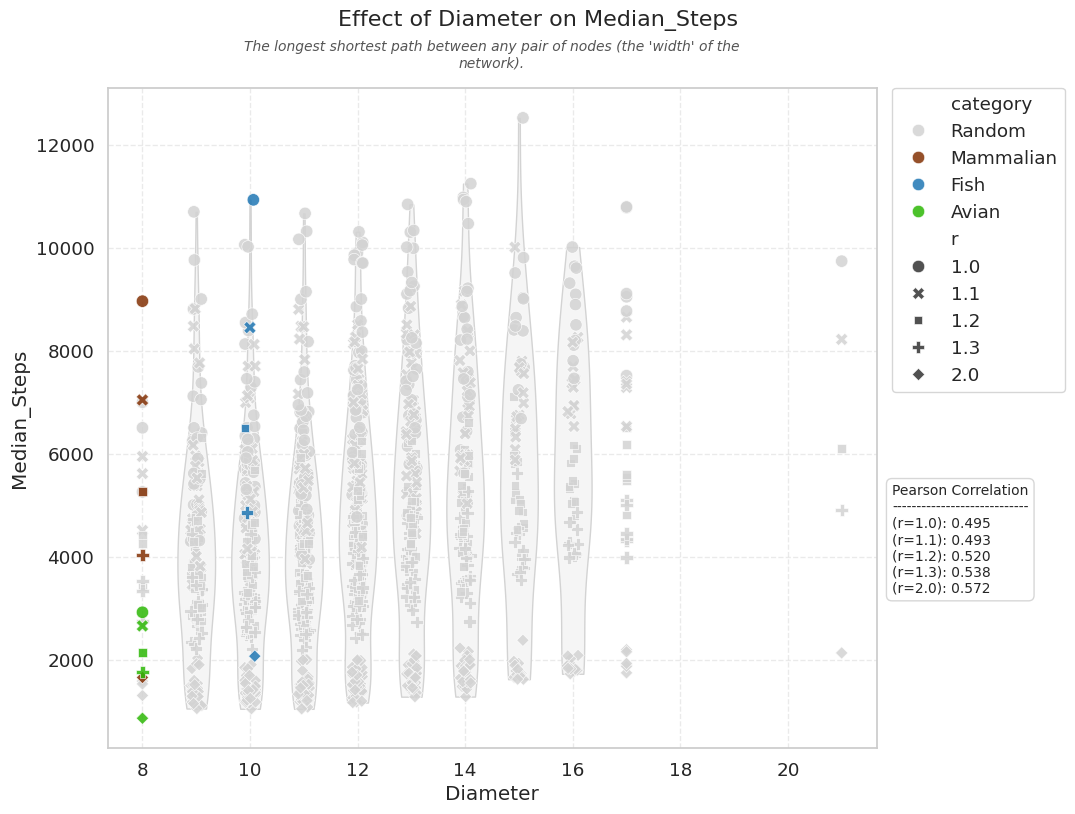

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


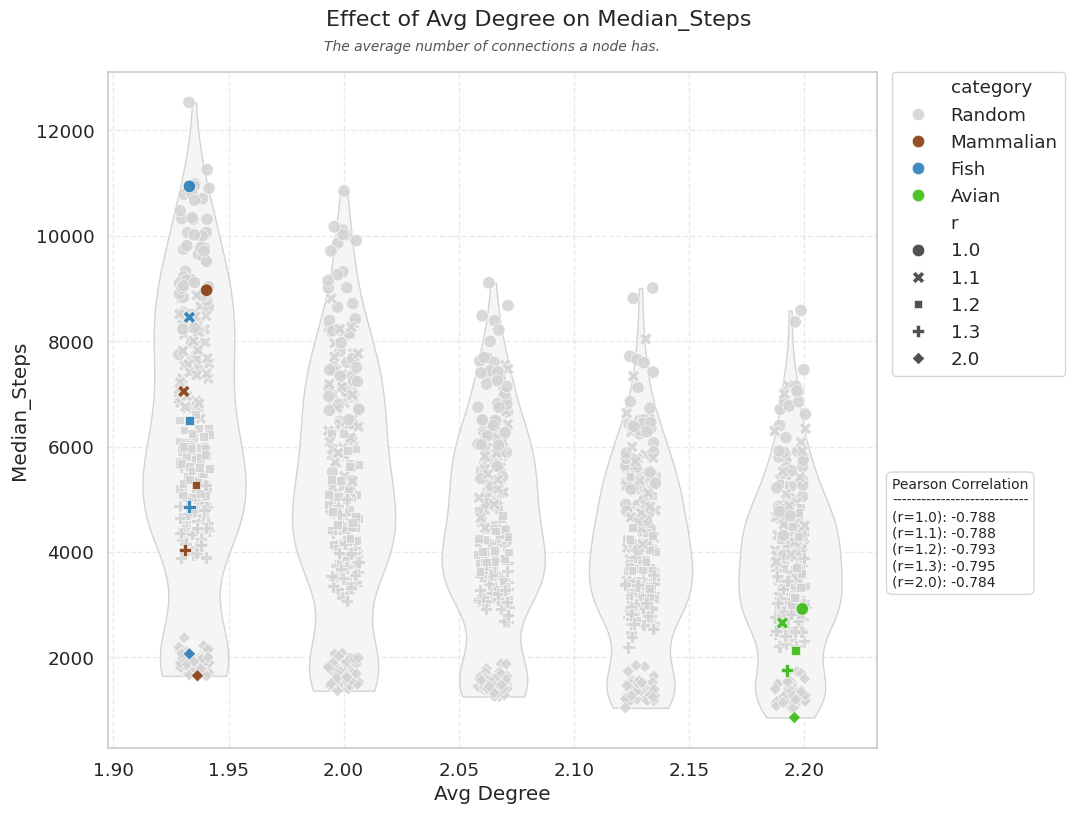

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


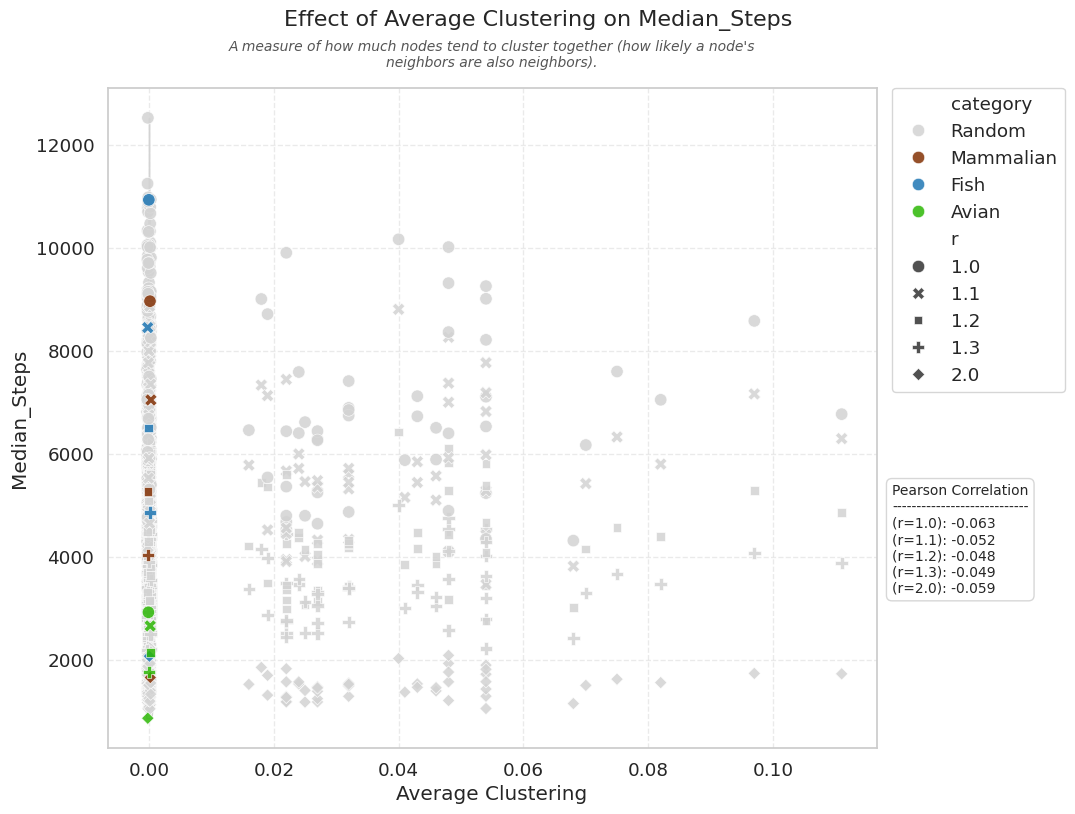

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


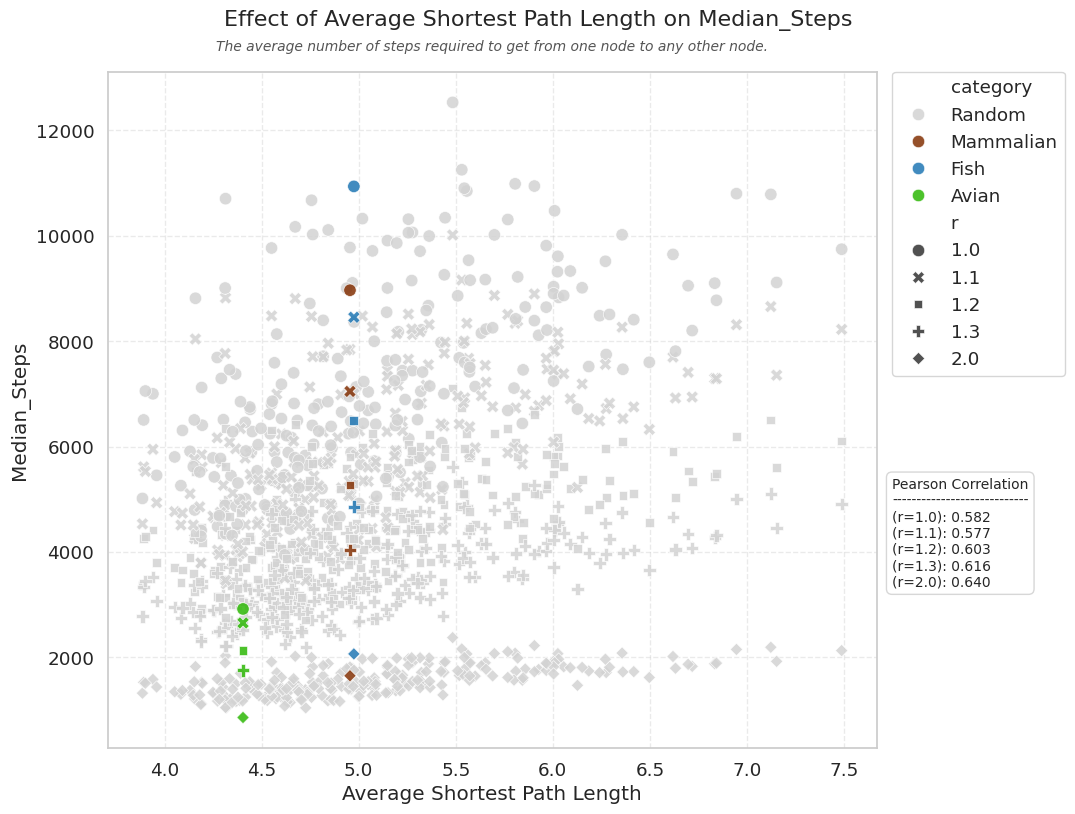

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


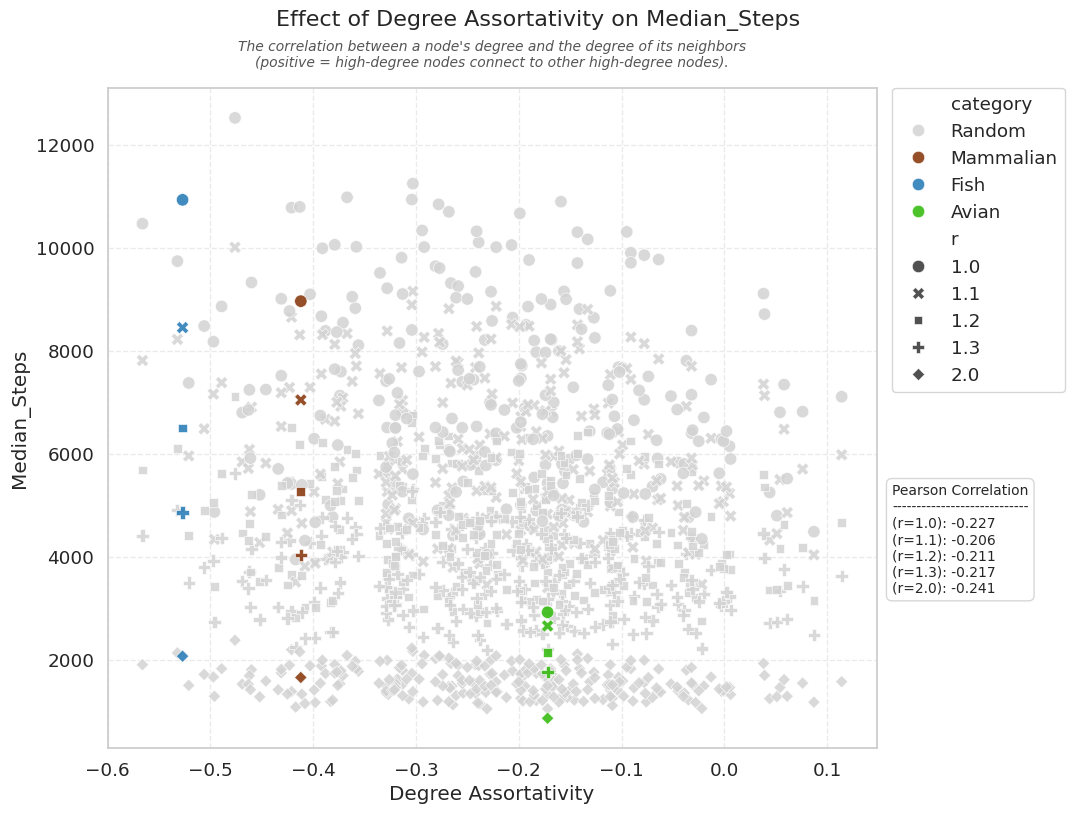

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


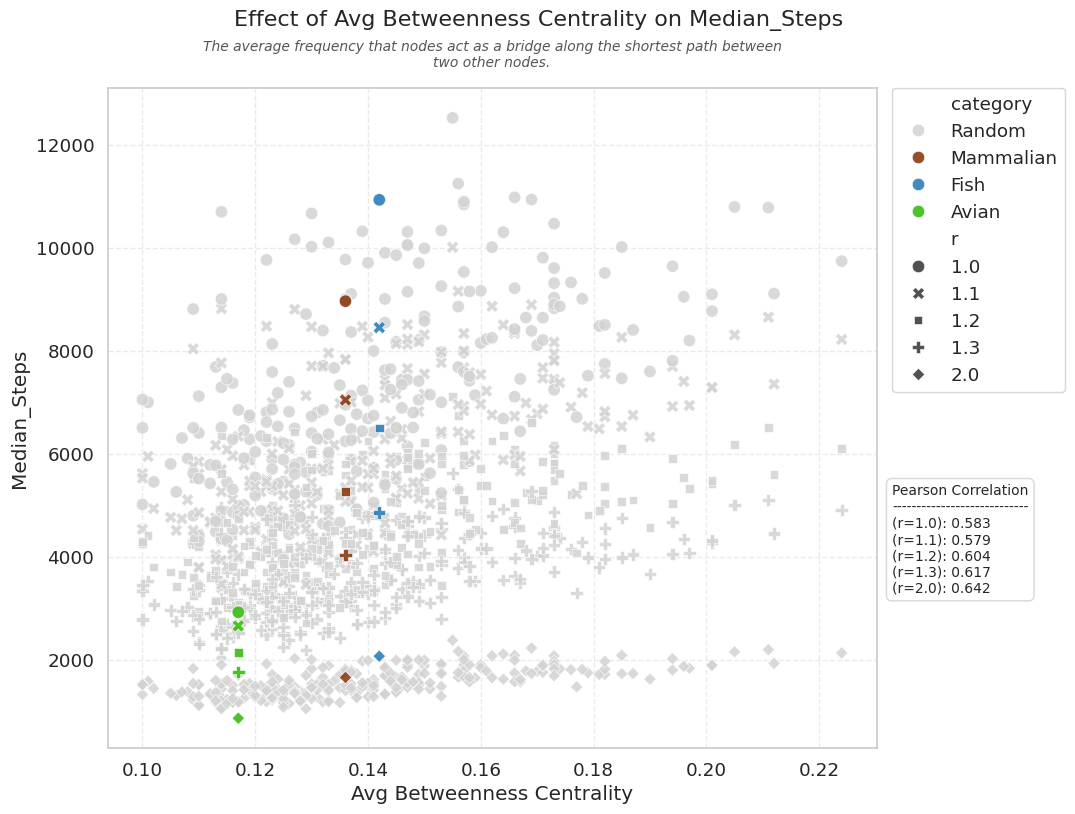

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


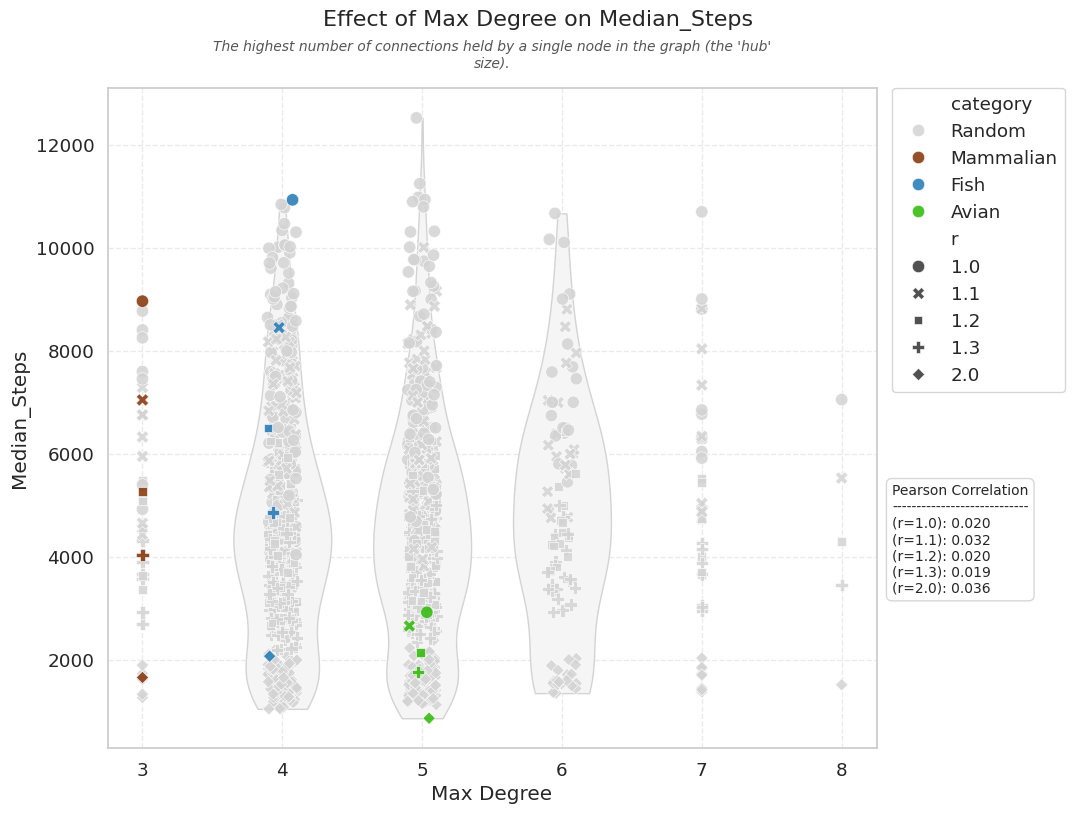

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


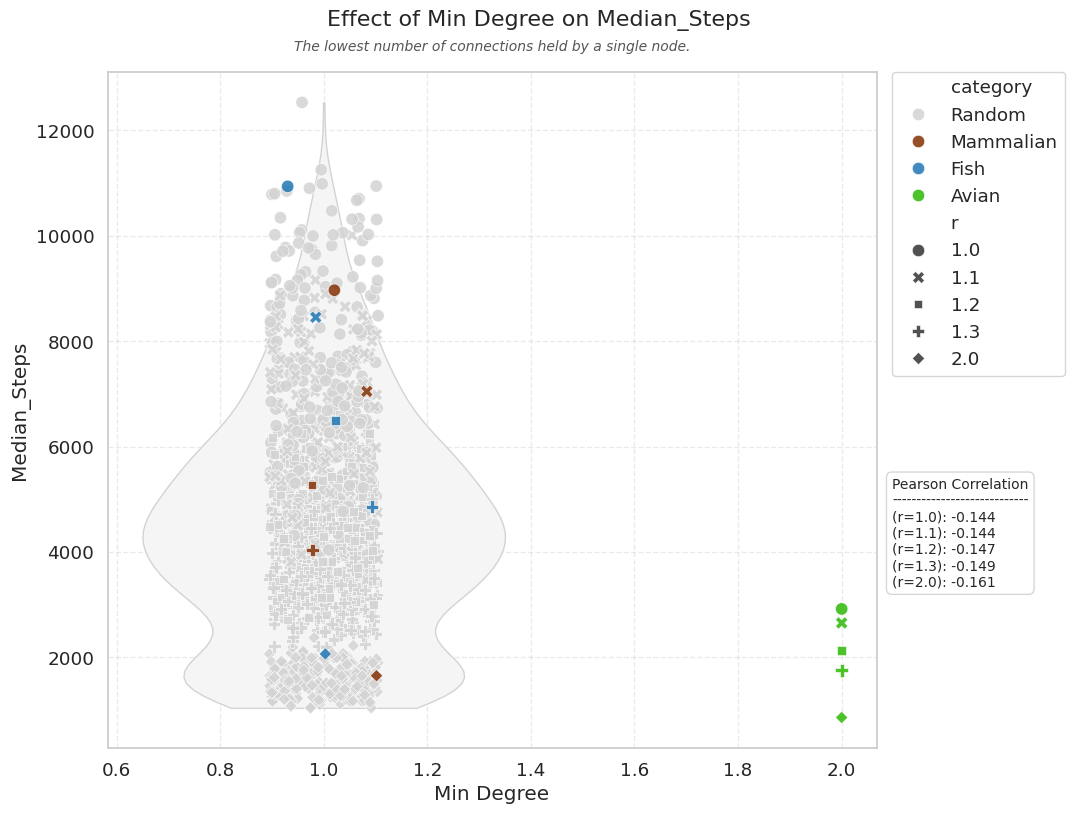

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


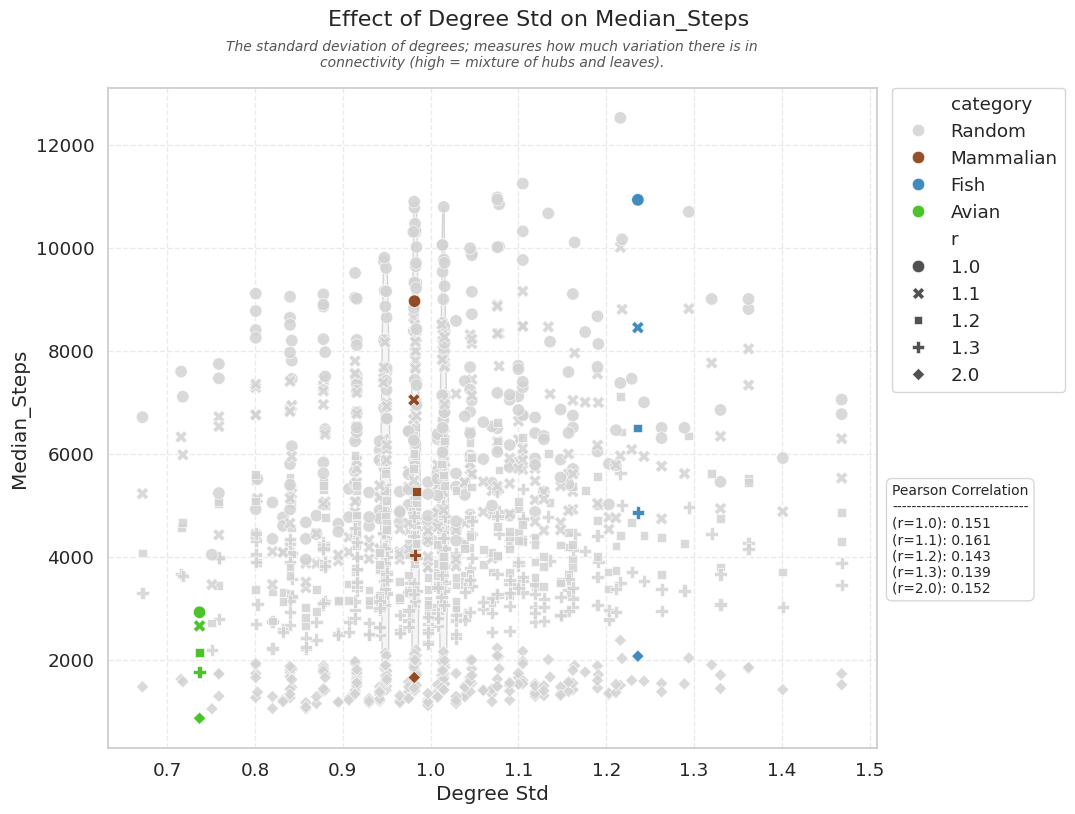

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


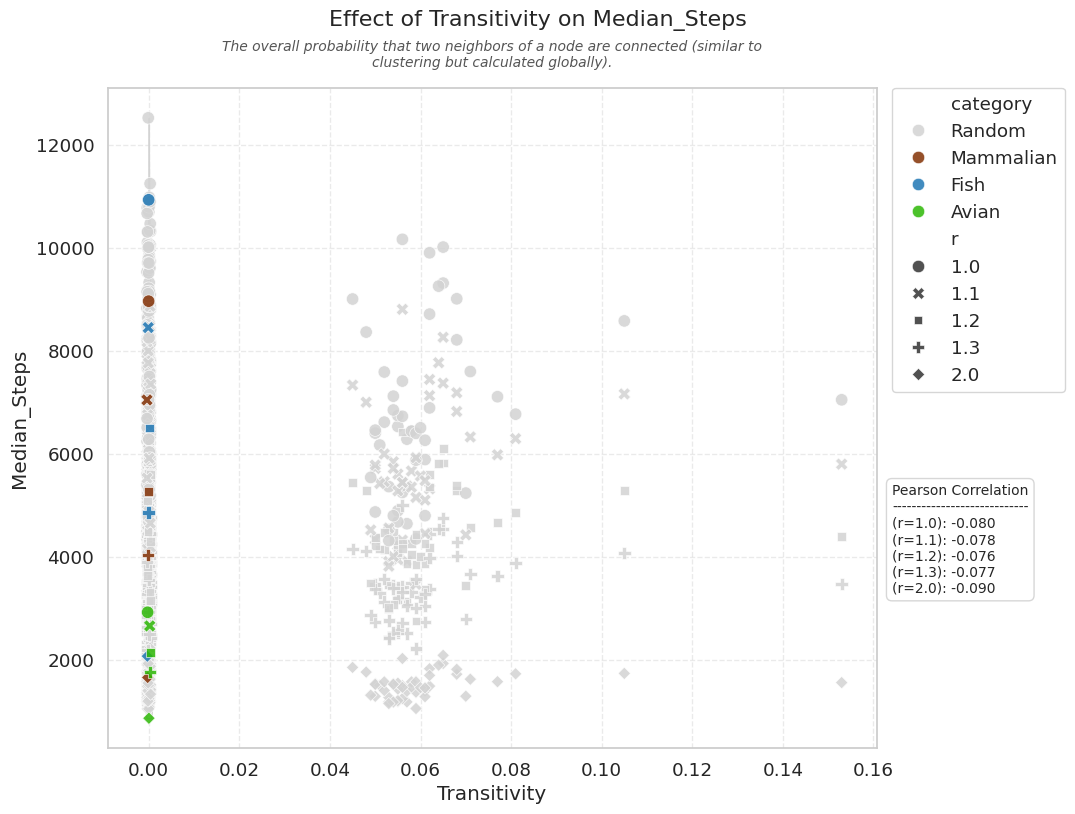

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


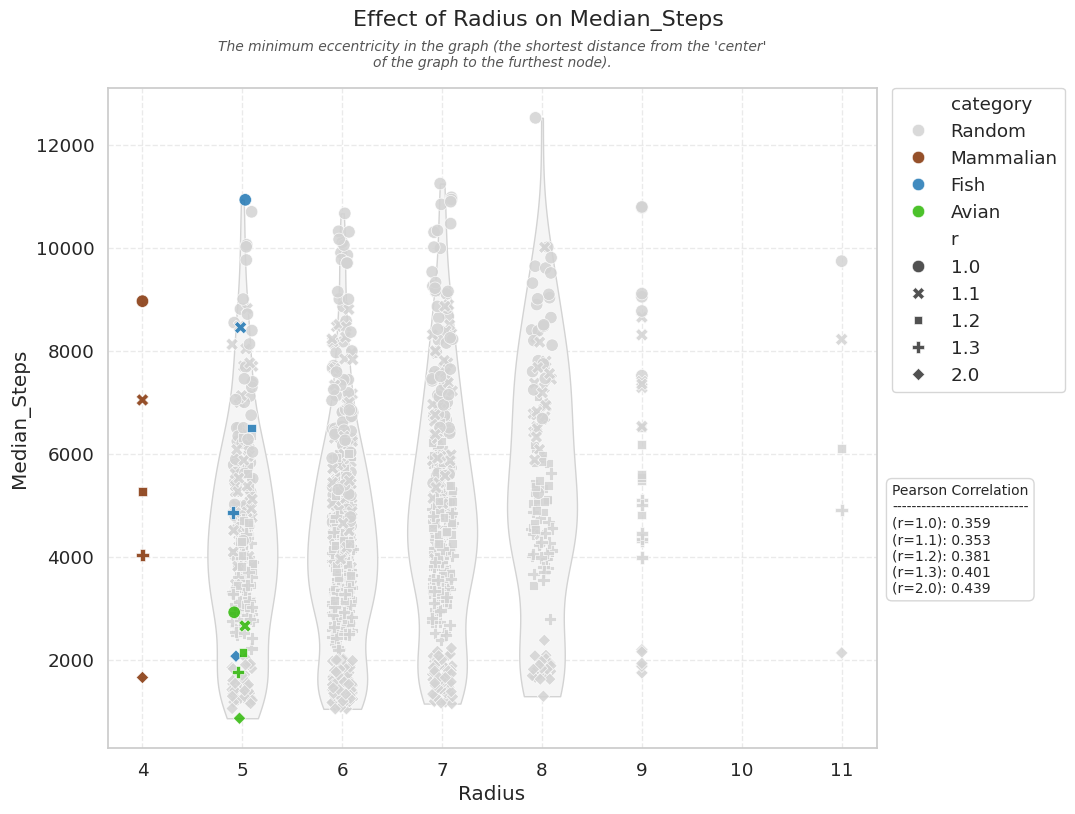

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


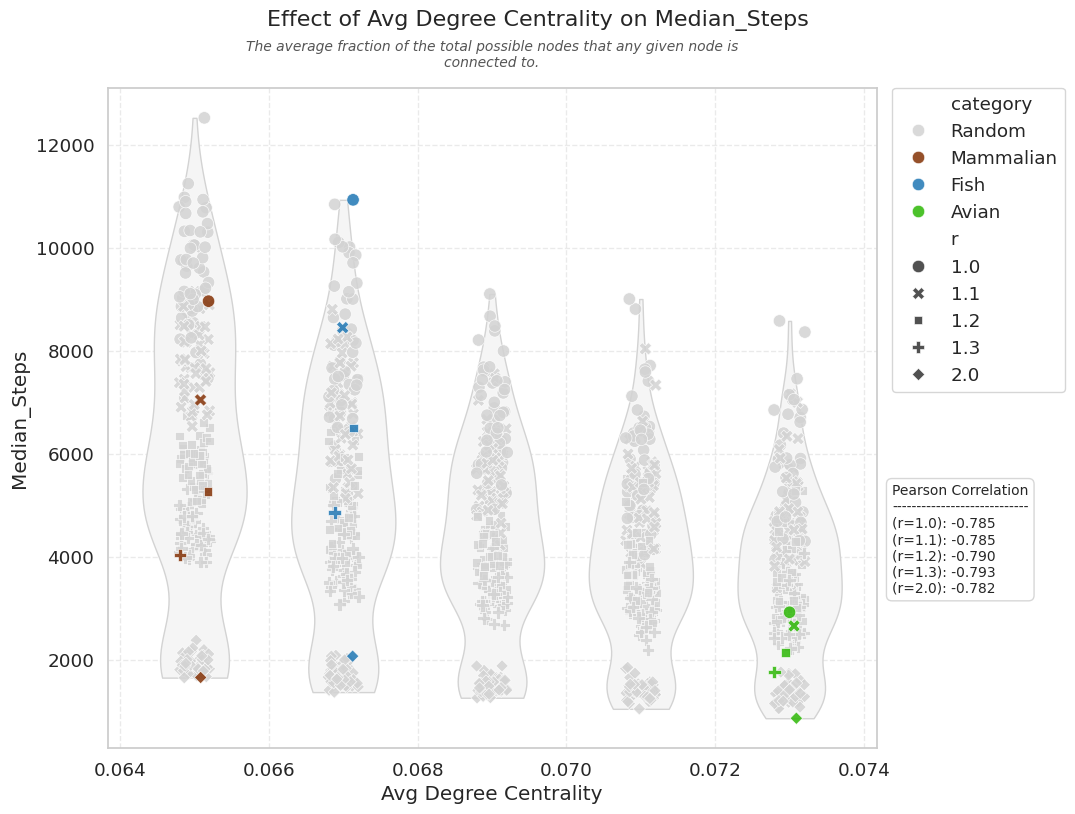

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


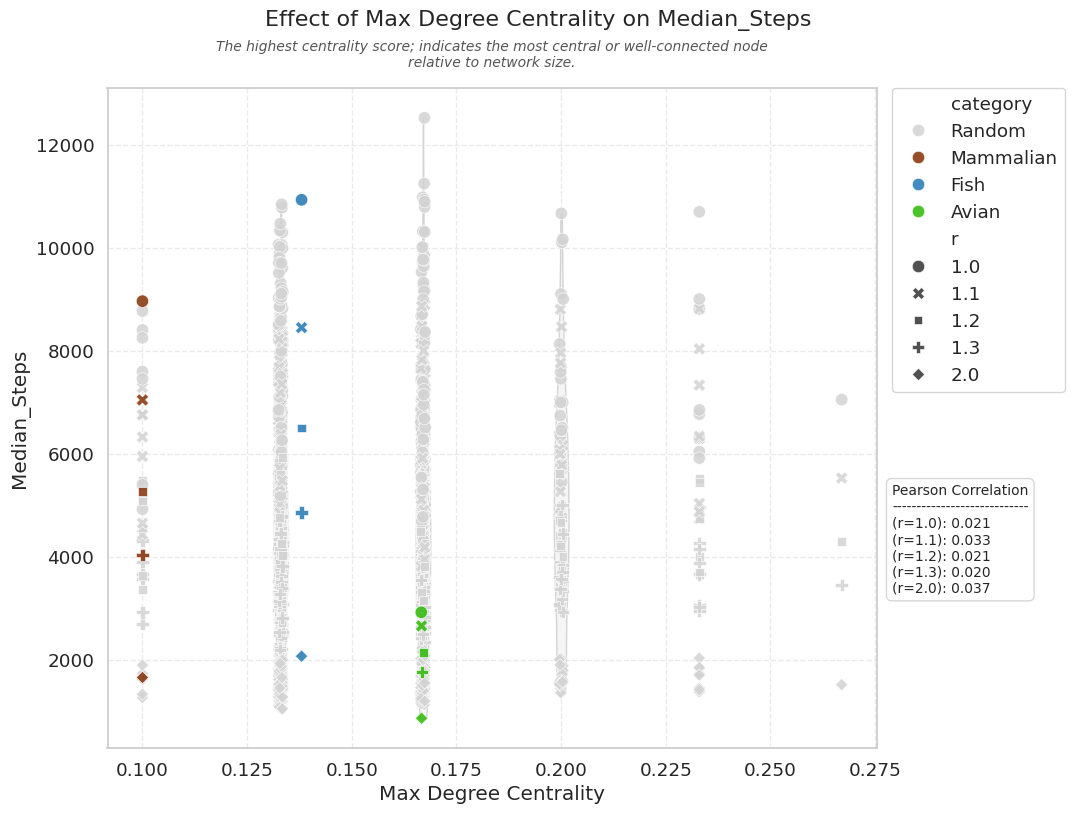

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


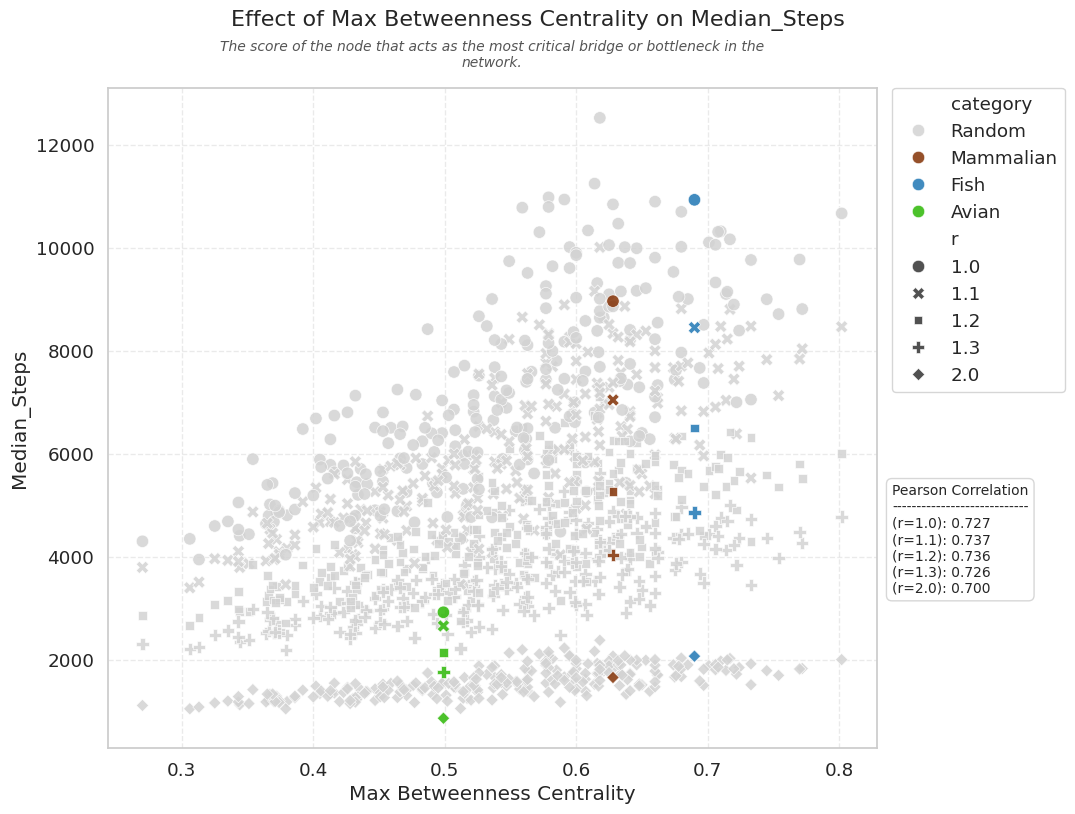

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


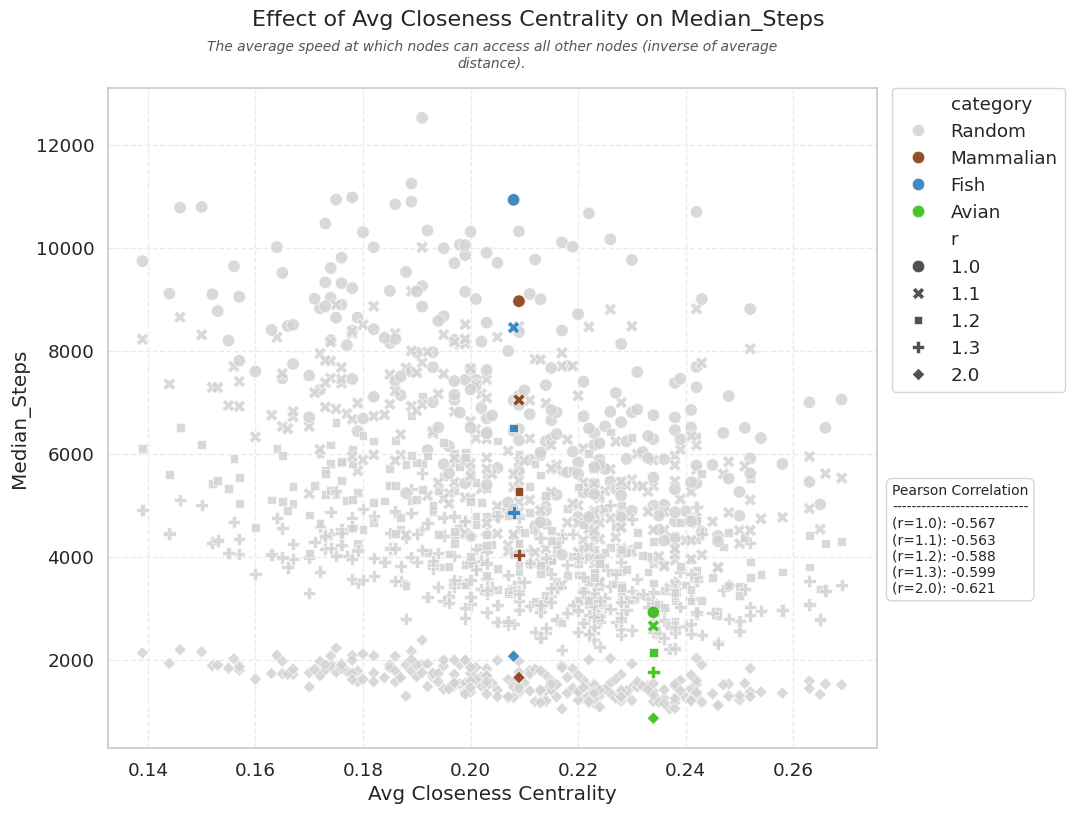

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


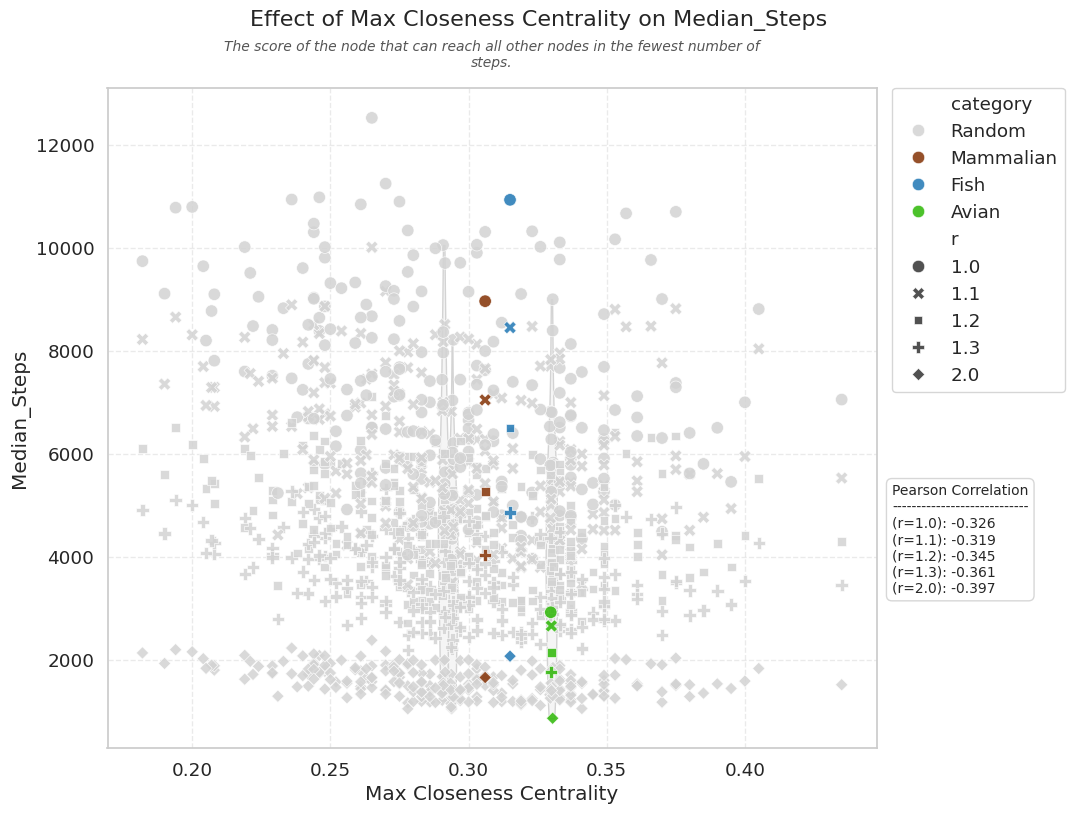

In [11]:
NEW_GRAPH_PROPS = ['avg_degree', 'max_degree']
print(GRAPH_PROPS)
# plot_property_effect(analysis_df, 'median_steps', 'prob_fixation')
# --- EXAMPLES OF USAGE ---
for prop in GRAPH_PROPS:
    # plot_property_effect(analysis_df, prop, 'median_steps')
    # plot_hexbin_property_effect(analysis_df, prop, 'median_steps')
    plot_hybrid_density(analysis_df, prop, 'median_steps', density_threshold=50, with_violin=True)

19


/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


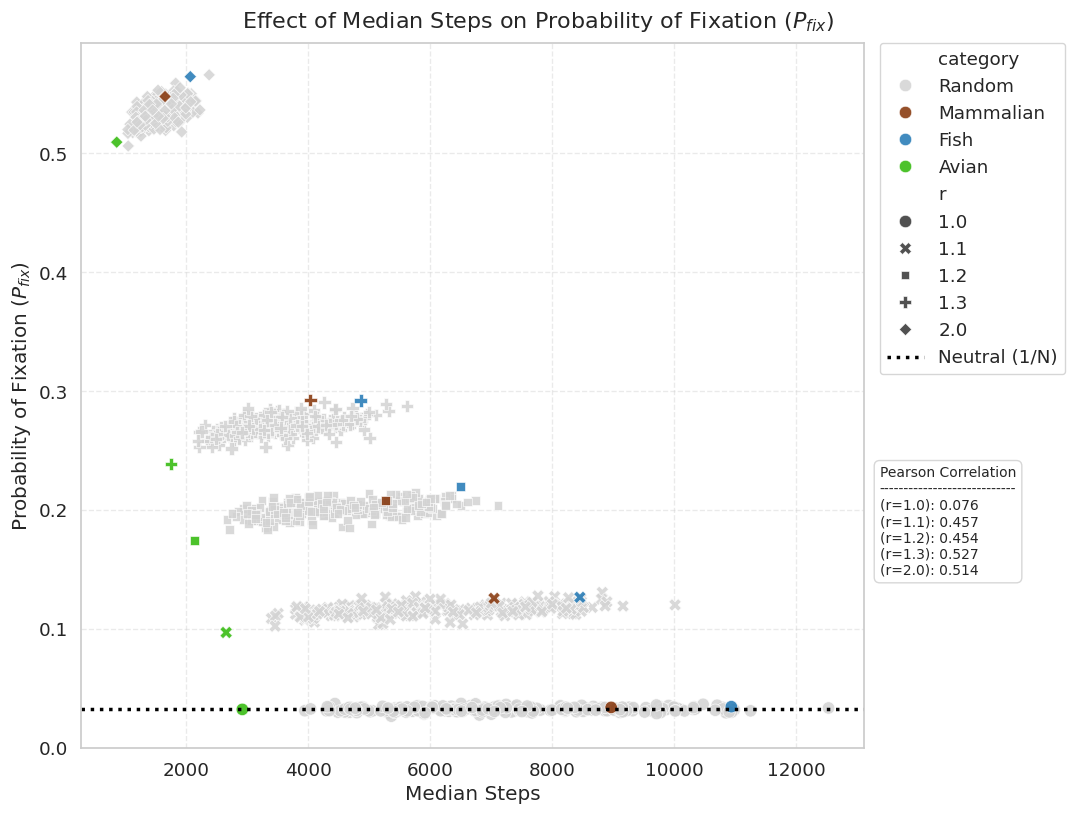

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


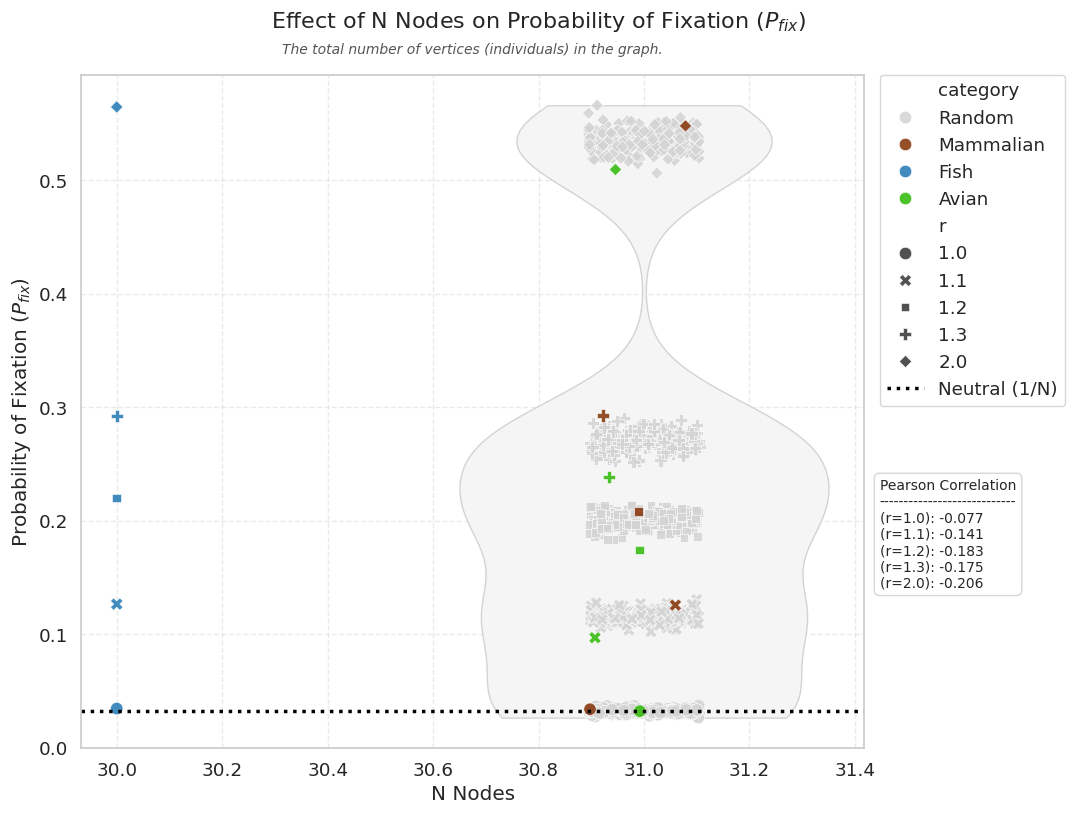

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


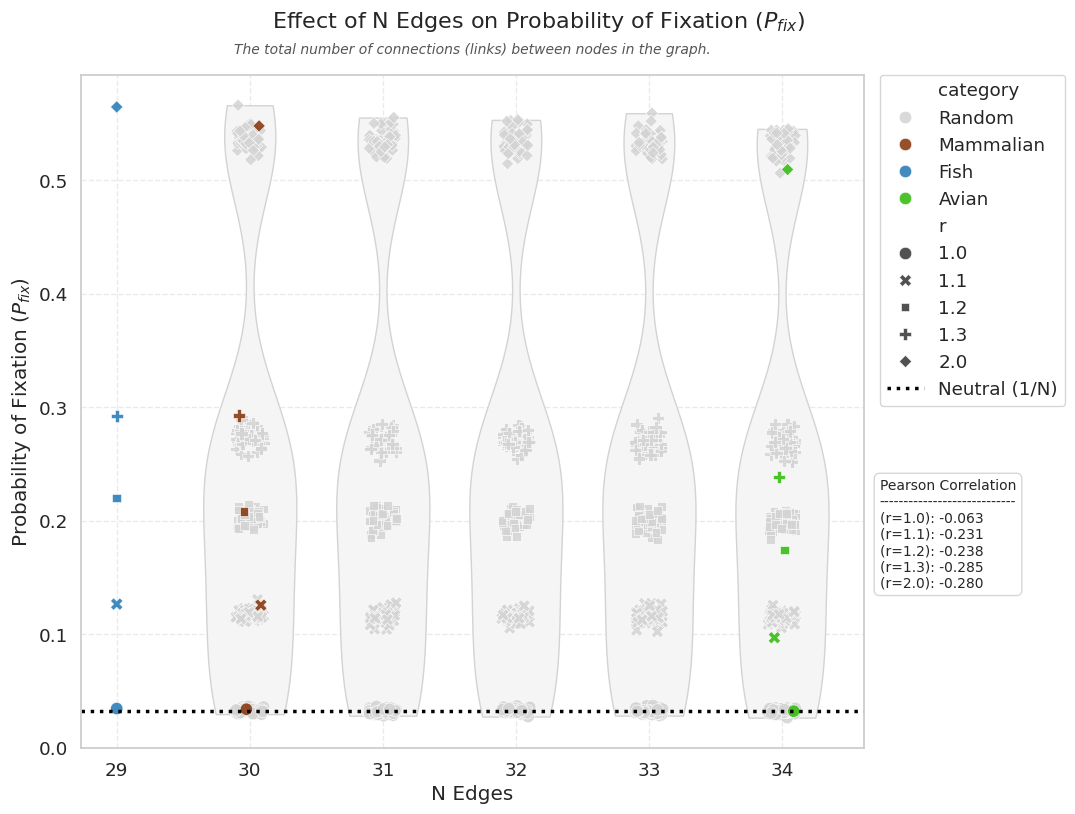

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


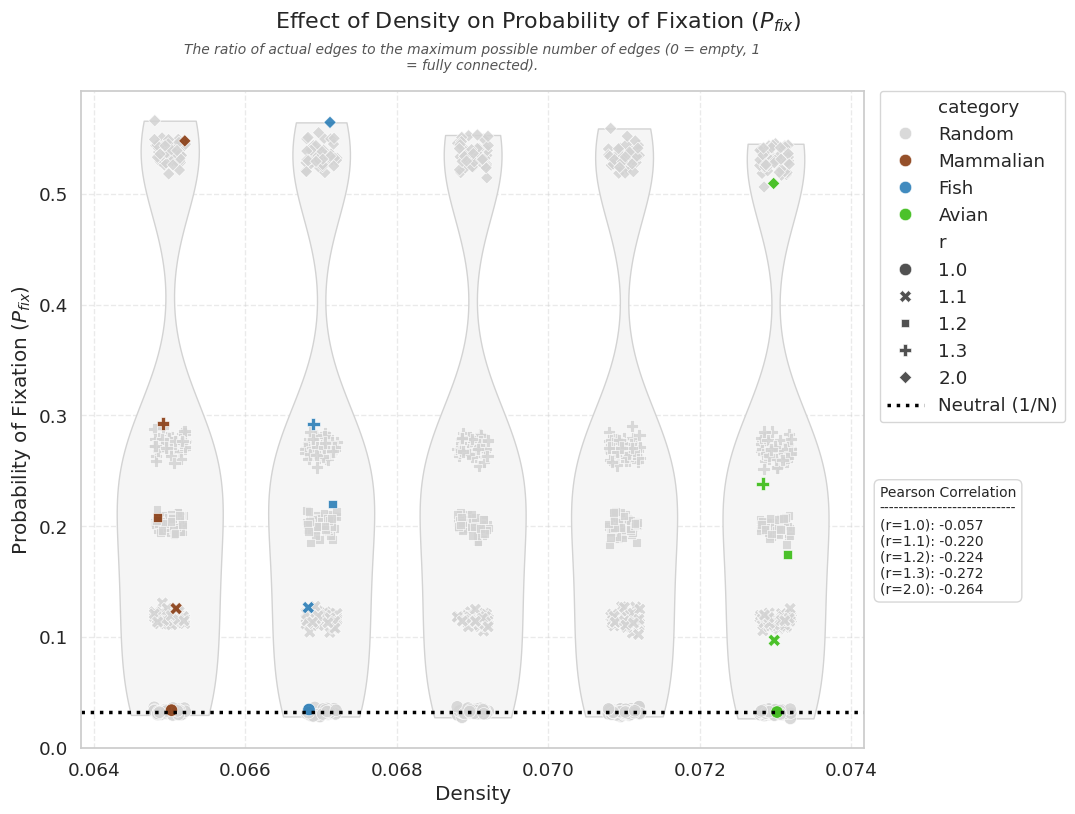

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


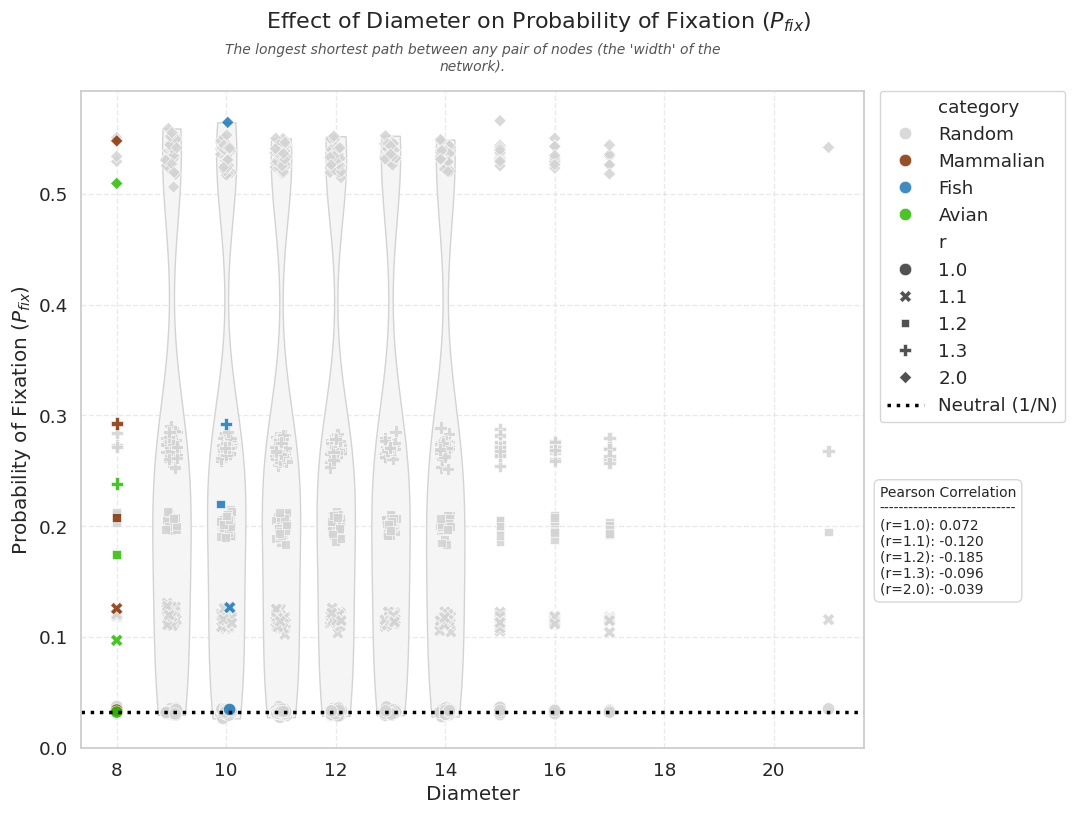

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


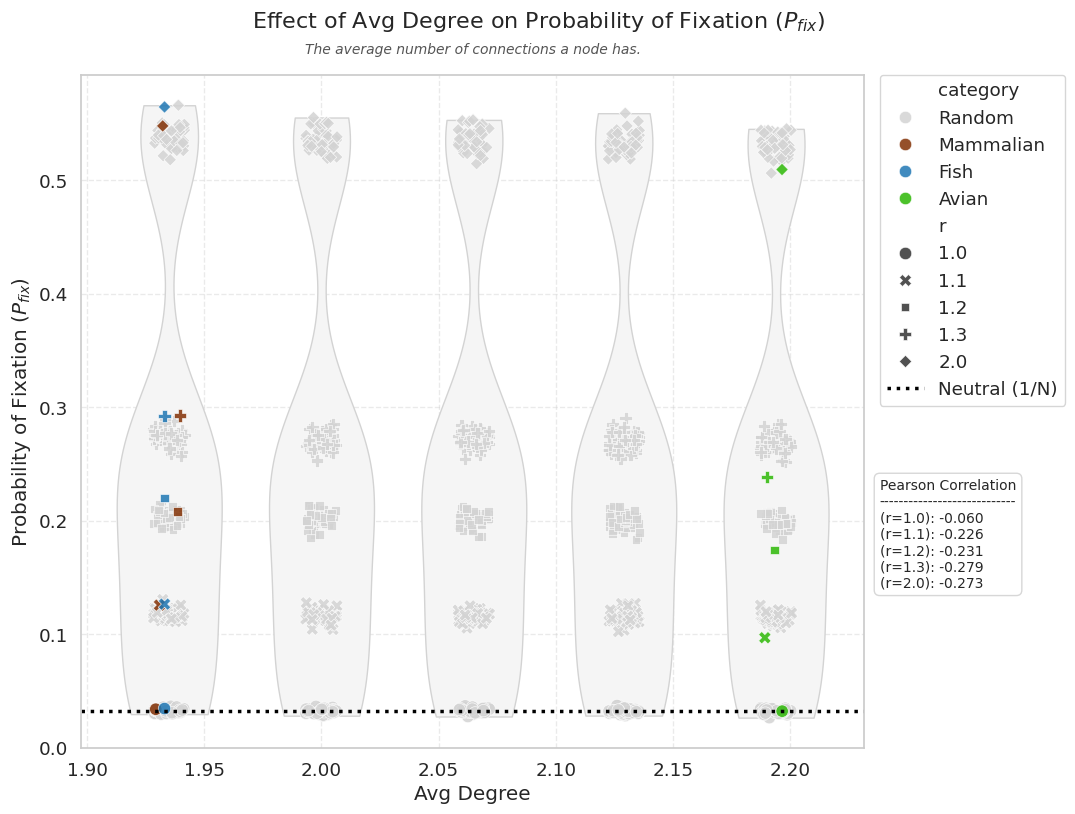

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


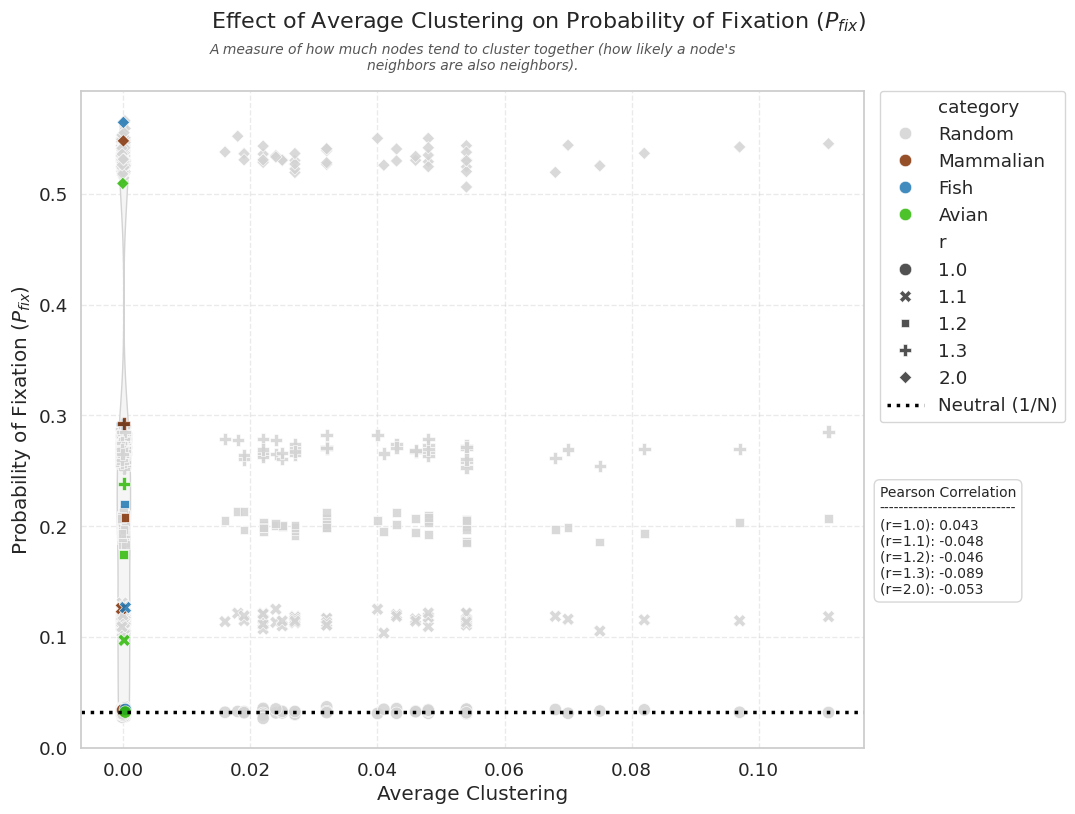

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


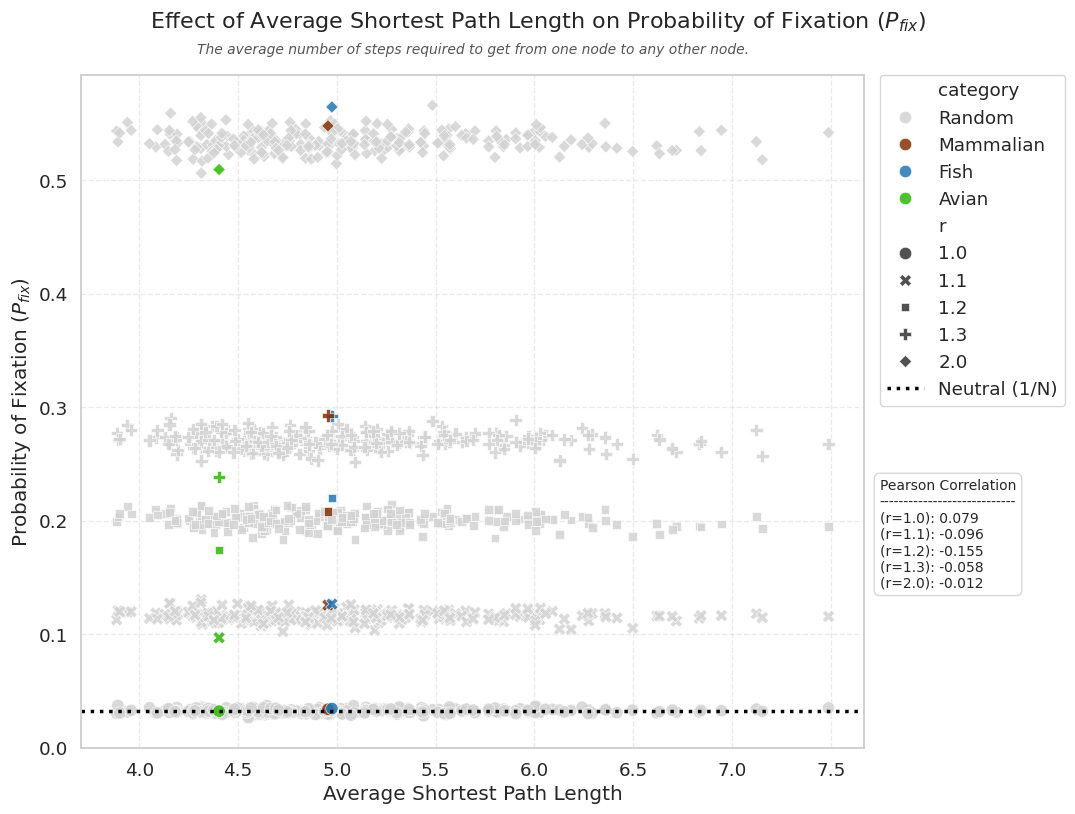

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


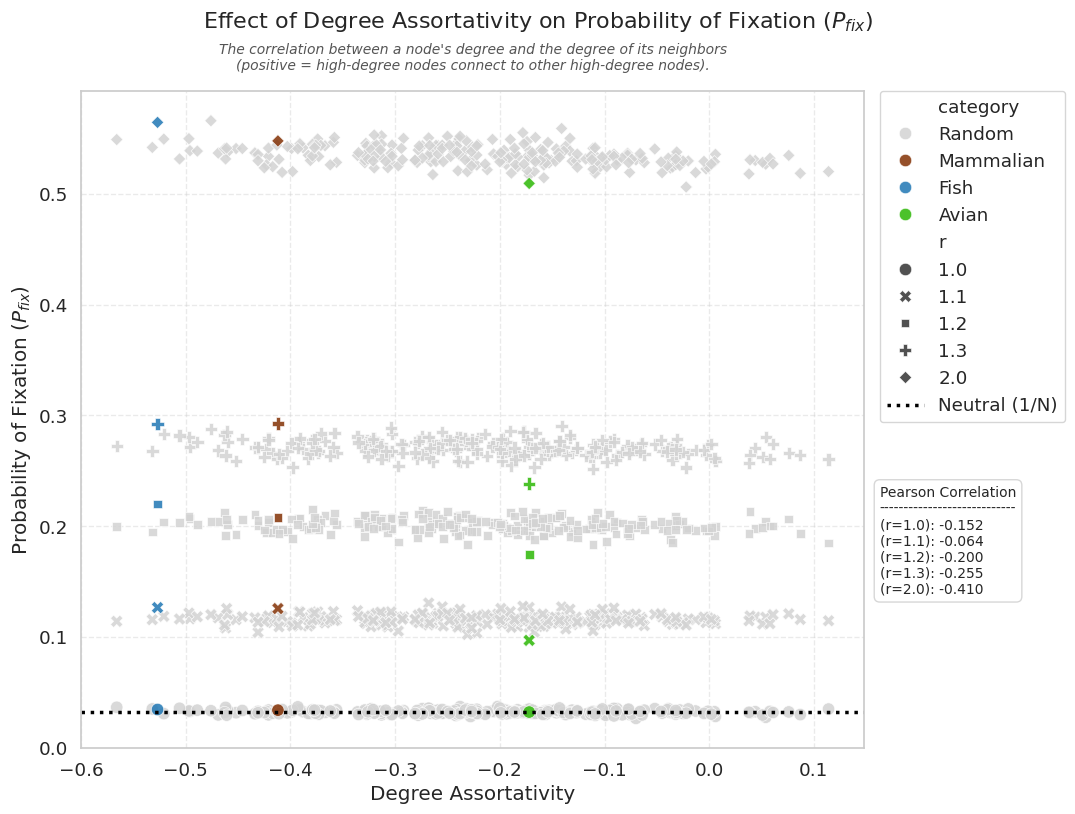

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


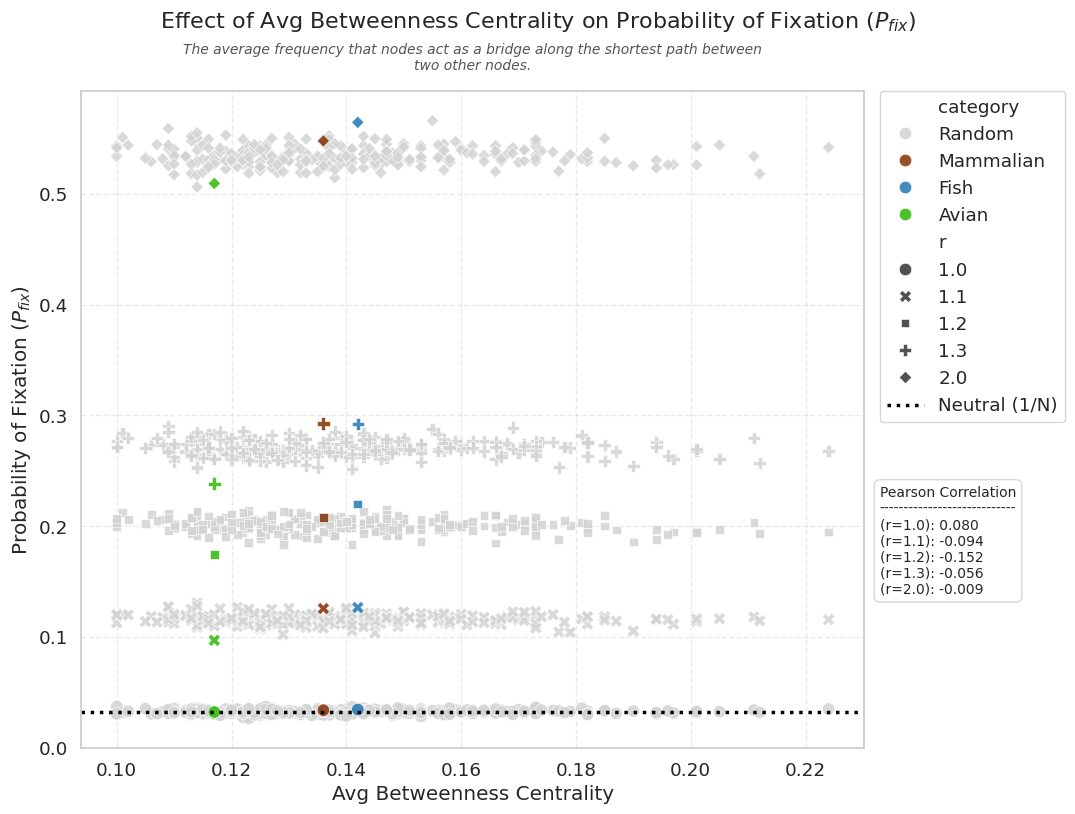

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


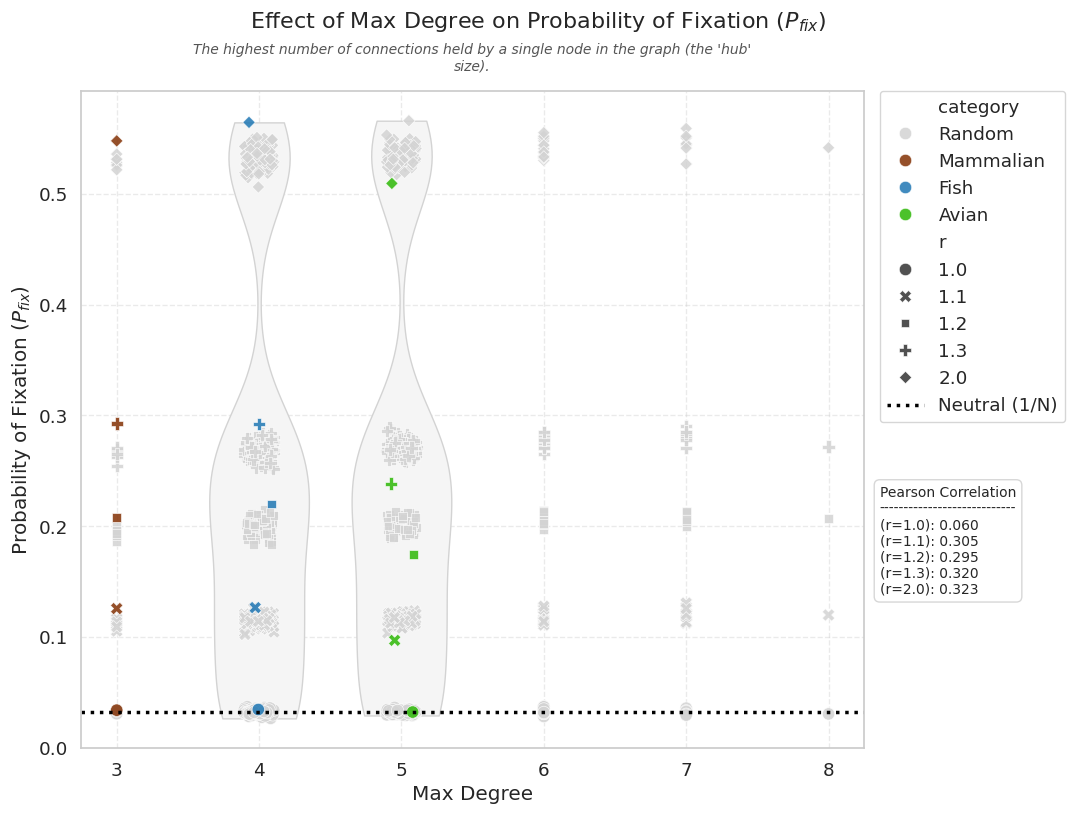

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


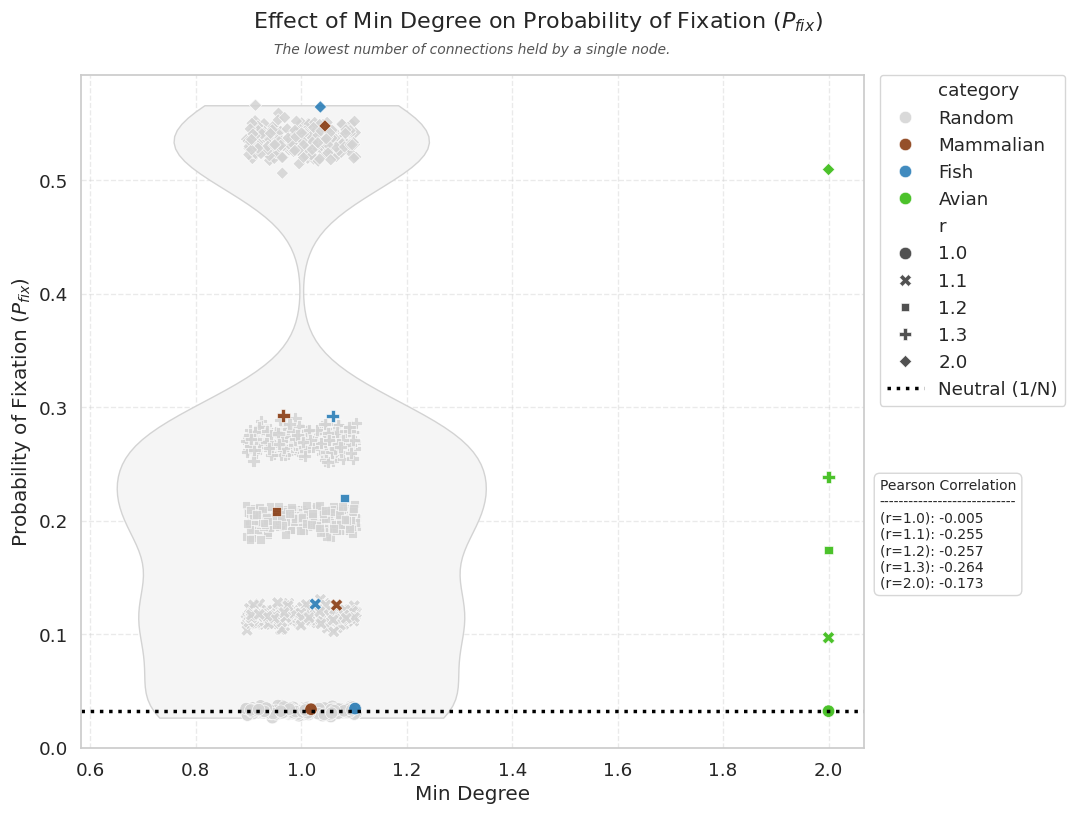

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


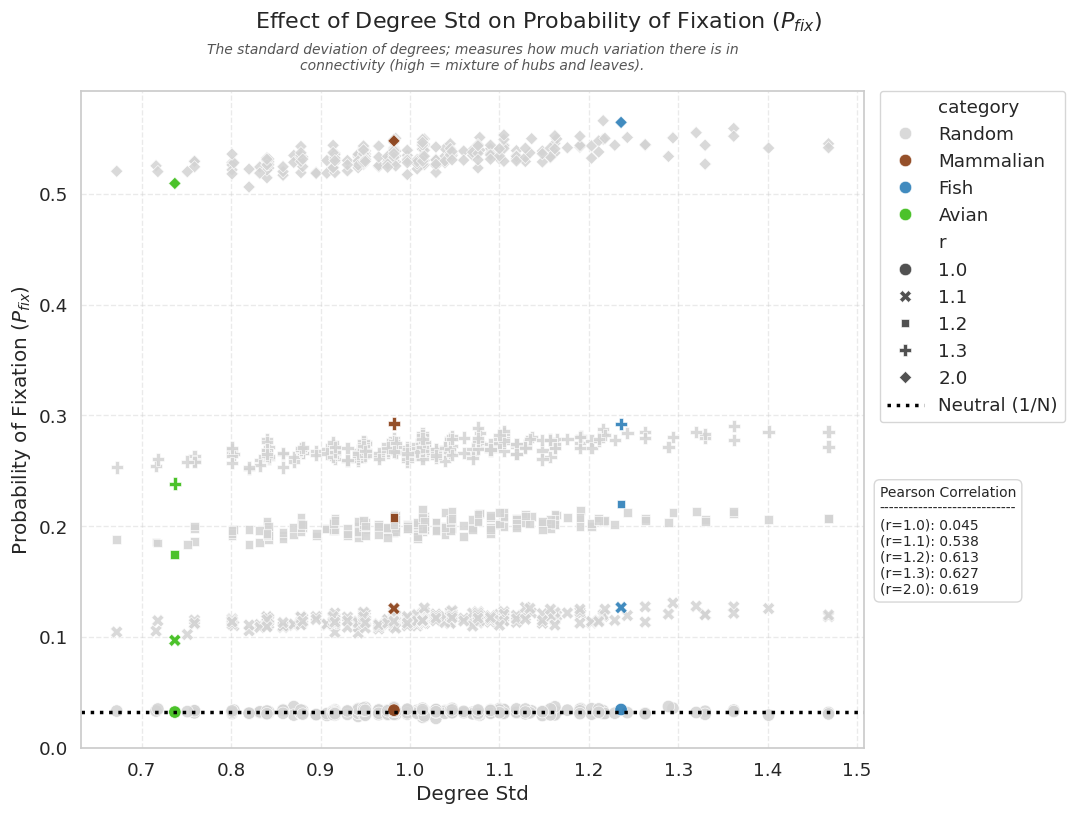

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


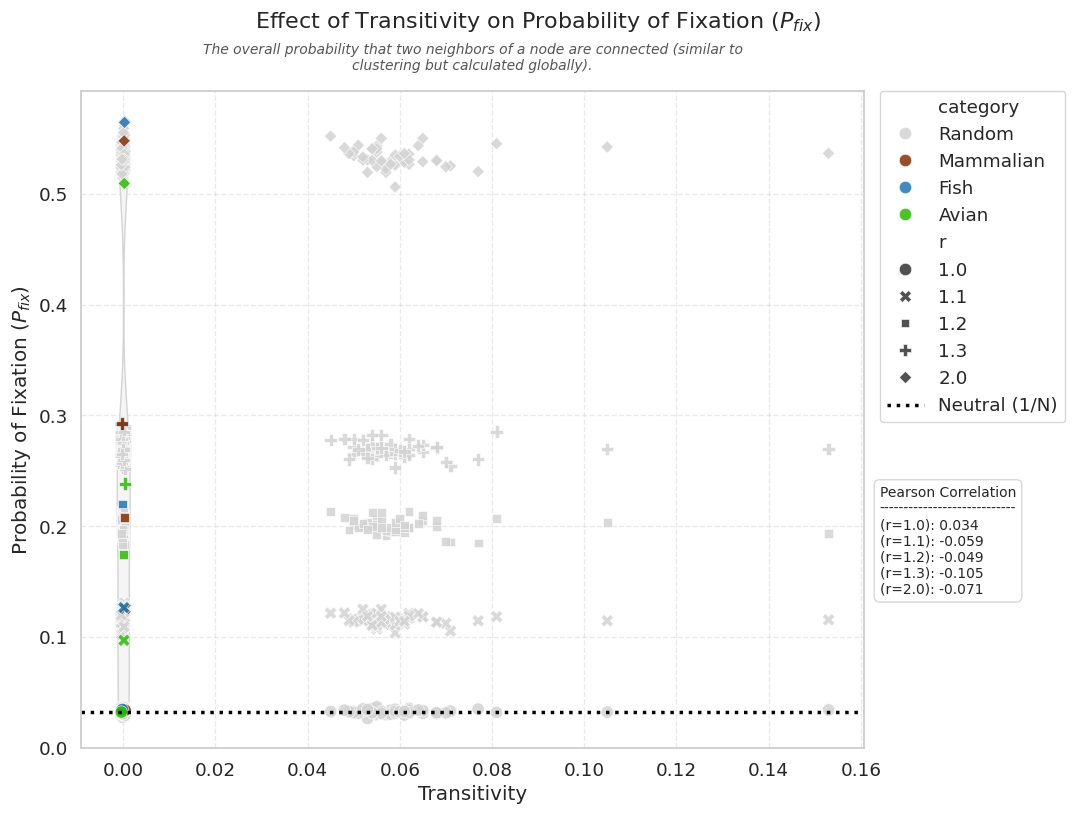

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


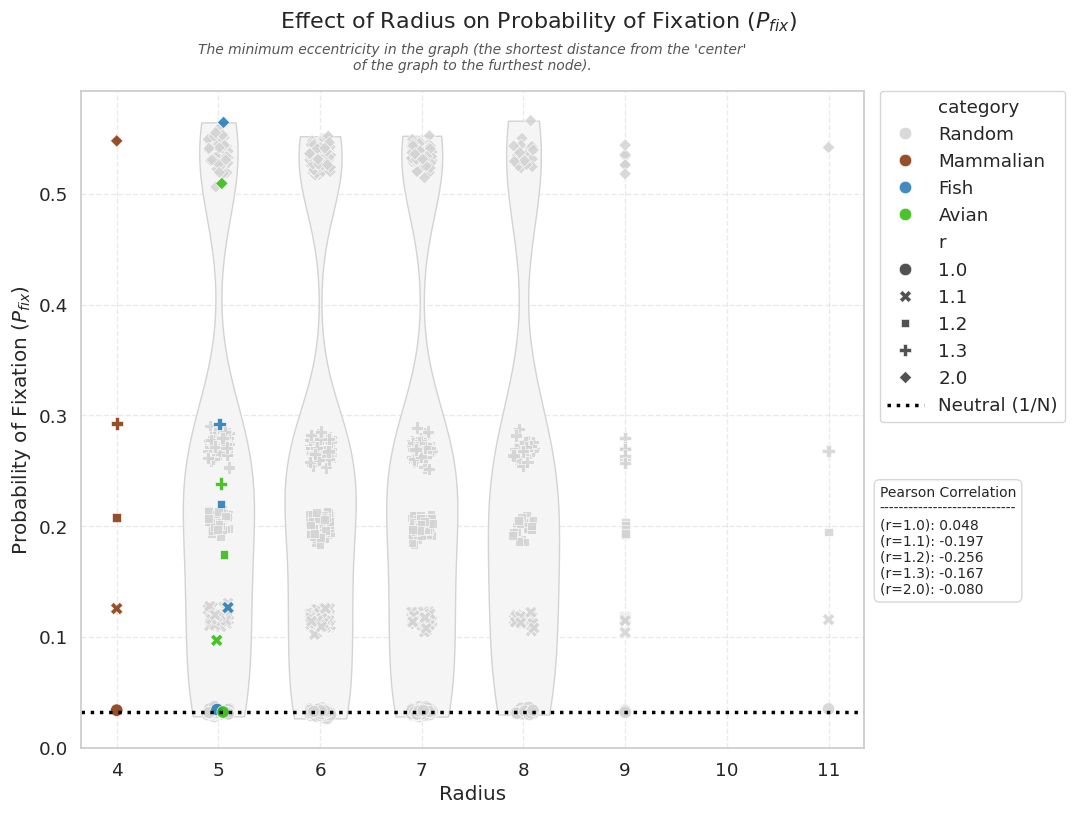

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


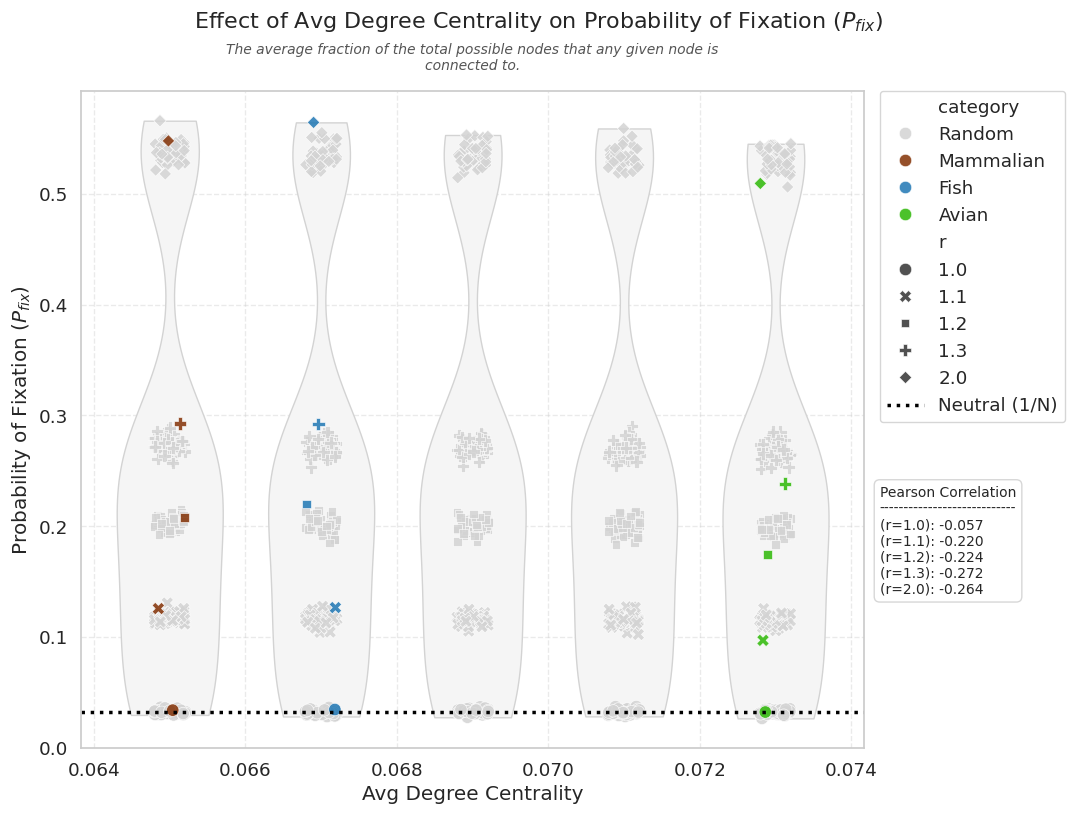

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


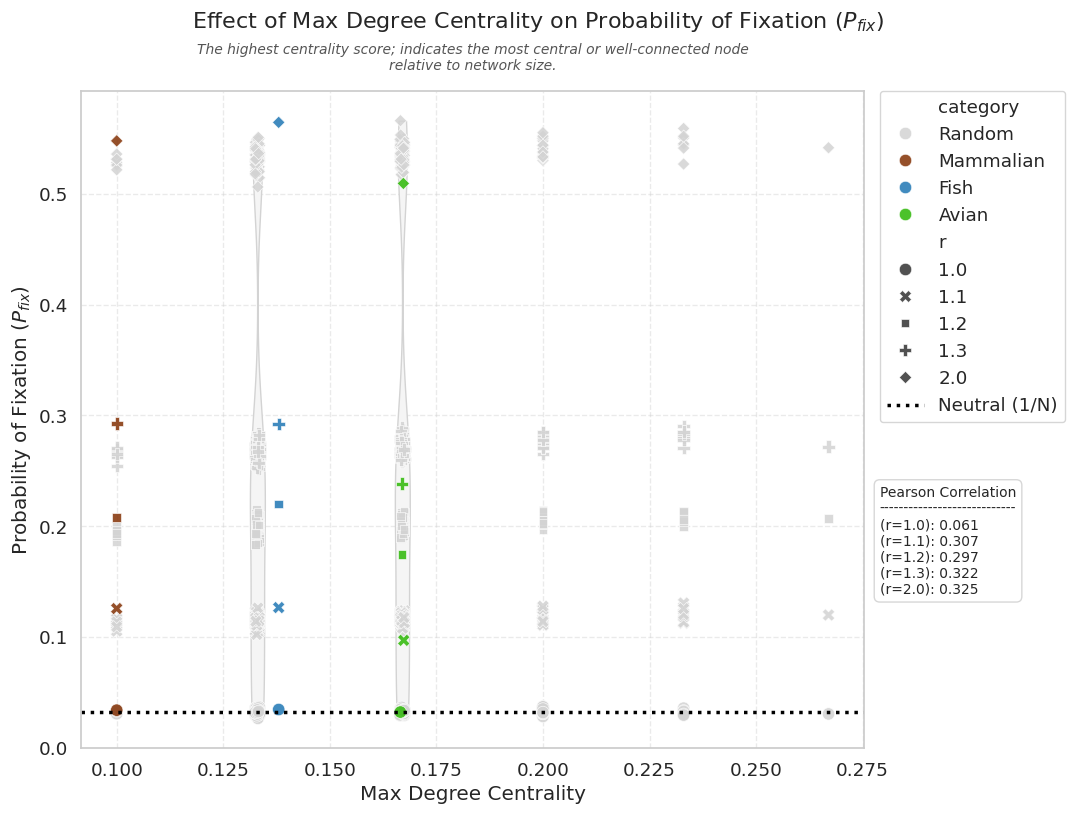

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


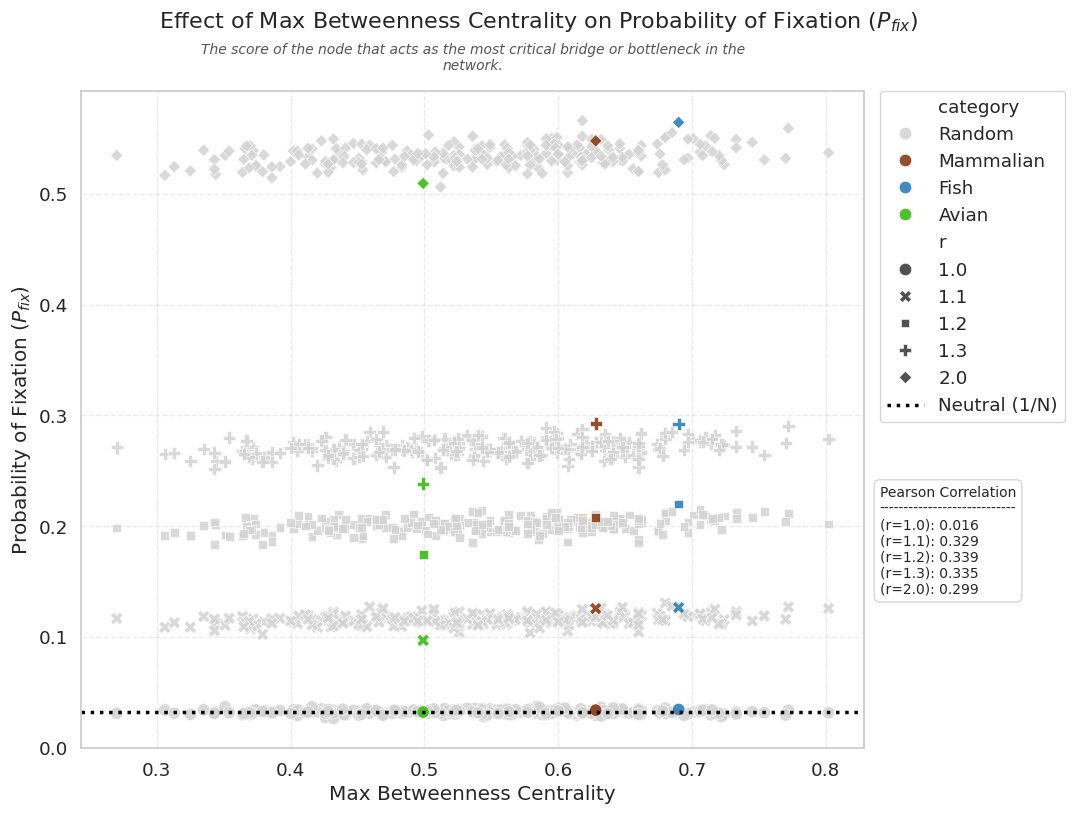

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


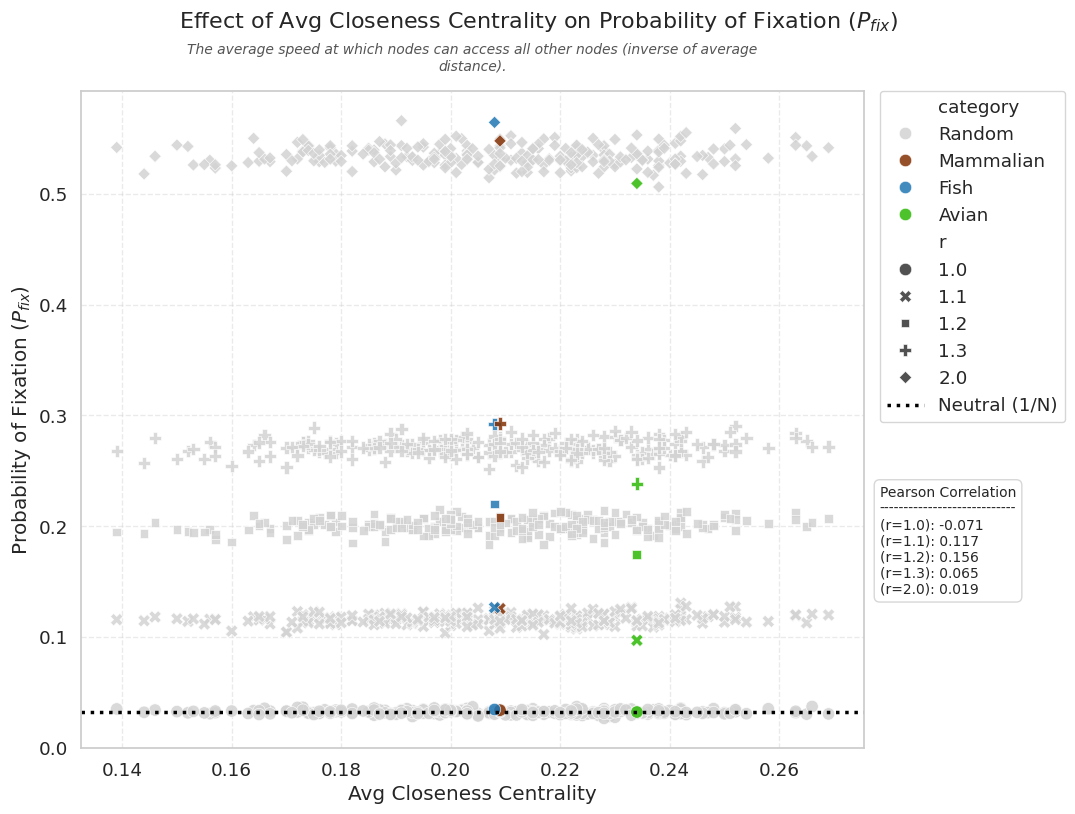

/home/labs/pilpel/matanyaw/moran-process/analysis/analysis_utils.py:256: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs_by_r = r_groups.apply(lambda g: g[x_prop].corr(g[y_outcome]))


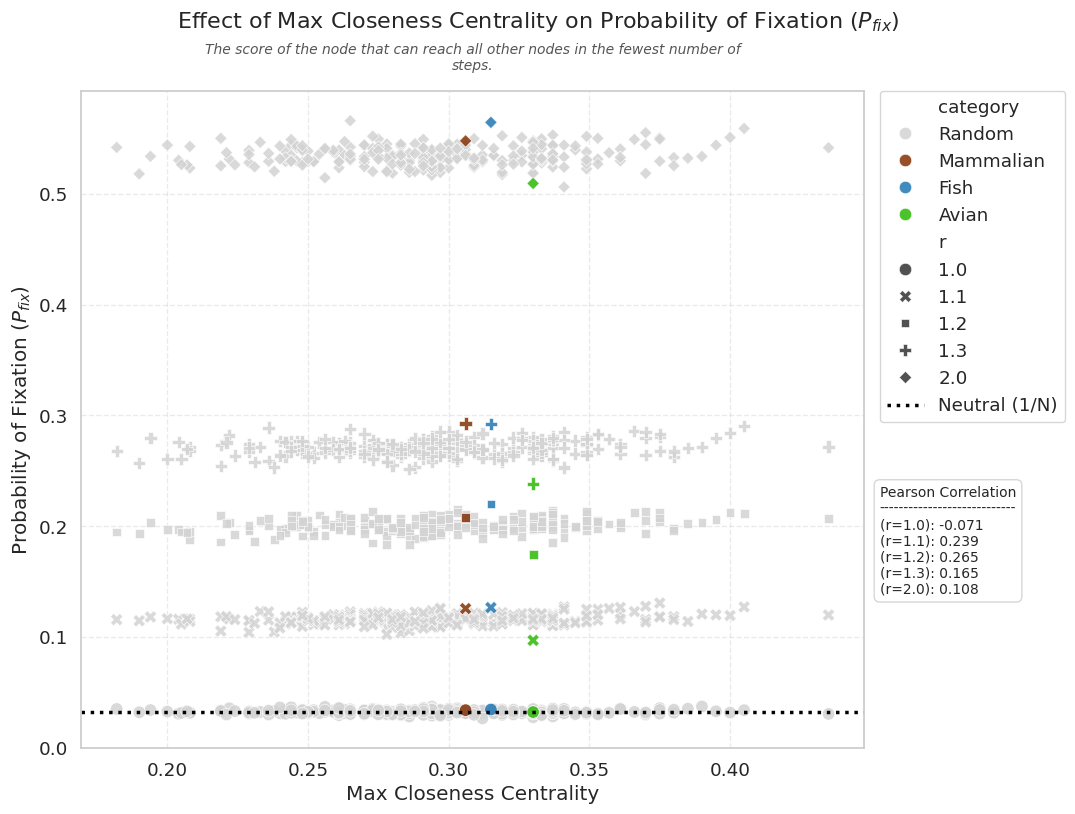

In [12]:
print(len(GRAPH_PROPS))
plot_hybrid_density(analysis_df, 'median_steps', 'prob_fixation')
# --- EXAMPLES OF USAGE ---
for prop in GRAPH_PROPS:
    plot_hybrid_density(analysis_df, prop)
